| Name | Admin No | Class |
| --- | --- | --- |
| Goh Rui Zhuo | 2222329 | DAAA/2A/05 |

# __Default Payment Classfication model__

## <font color='#63B2CB'> __Table of Contents__</font>
1. [Problem Statement](#1)     
1. [Background Research](#2) 
1. [Import the data](#3) 
1. [Import the library](#4) 
1. [Exploratory Data Analysis](#5) 
1. [Feature Engineering](#6) 
1. [Data Preprocessing](#7) 
1. [Model (Baseline)](#8) 
1. [Analysis of the model](#9) 
1. [Advanced Model](#10) 
1. [Hyperparameter Tune](#11) 
1. [Stacking Classifier](#15) 
1. [Final Model](#12) 
1. [Feature Importance](#13) 
1. [Summary](#14) 

<a class="anchor" id="1"></a>
## <font color='#63B2CB'> __Problem Statement / Objective__</font>



>To predict which customer will have default payment in the next month.

> Output variable: Default payment next month , 0 means paid while 1 means not paid


![Bank2](bank.jpg)

<a class="anchor" id="2"></a>
## <font color='#63B2CB'>__Background research__</font>

- In default payment, the word  default is failure to meet the legal obligations (or conditions) of a loan,  for example when a home buyer fails to make a mortgage payment, or when a corporation or government fails to pay a bond which has reached maturity. A national or sovereign default is the failure or refusal of a government to repay its national debt

- In addition, there will be a credit limit which determines how much one can spend on the creidt card. This can be based on annual income, credit report and other factors

- Overall, the main aim of this is to predict whether a customer with different infos that they are able to repay it properly

<a class="anchor" id="3"></a>
## <font color='#63B2CB'>__Import Libraries__</font>

In [2]:
!pip install pandas-profiling
!pip install imblearn


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Importing all the required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from termcolor import colored

C:\Users\ruizh\AppData\Local\Temp\ipykernel_30660\4148577230.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [4]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, learning_curve ,RepeatedStratifiedKFold
from sklearn.feature_selection import SelectFromModel, RFE, SelectKBest, chi2, mutual_info_classif,f_classif
from sklearn.metrics import  roc_curve, make_scorer, fbeta_score, confusion_matrix, classification_report,RocCurveDisplay,ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder, KBinsDiscretizer,MinMaxScaler,Normalizer
from sklearn.impute import SimpleImputer 
from imblearn.over_sampling import ADASYN
from sklearn.decomposition import PCA
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier , ExtraTreesClassifier,RandomForestClassifier ,AdaBoostClassifier,HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,CategoricalNB
from sklearn.linear_model import RidgeClassifierCV,RidgeClassifier,SGDClassifier,LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, validation_curve
from imblearn.over_sampling import SMOTE,KMeansSMOTE,SMOTEN
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from imblearn.over_sampling import SMOTEN,ADASYN, RandomOverSampler
from imblearn.combine import SMOTEENN
from sklearn.inspection import permutation_importance
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

<a class="anchor" id="4"></a>
## <font color='#63B2CB'>__Import dataset__</font>

In [5]:
df = pd.read_csv('credit_dataset.csv')
df = df.drop('Customer ID',axis=1)
df

Credit Limit  Gender      Education Marriage Status  Age  Bill_Amount1  \
0            20000  female    univeresity         married   24          3913   
1           120000  female    univeresity          single   26          2682   
2            90000  female    univeresity          single   34         29239   
3            50000  female    univeresity         married   37         46990   
4            50000    male    univeresity         married   57          8617   
...            ...     ...            ...             ...  ...           ...   
1595        480000  female    univeresity         married   35         18214   
1596        150000  female    univeresity         married   37          1184   
1597        110000  female  post-graduate          single   29        107195   
1598        240000    male  post-graduate          single   30          7744   
1599         50000    male  post-graduate          single   33         47853   

      Bill_Amount2  Bill_Amount3  Pay_Amount1  Pay_Amount2  Pay_Amount3  \
0             3102           689            0          689            0   
1             1725          2682            0         1000         1000   
2            14027         13559         1518         1500         1000   
3            48233         49291         2000         2019         1200   
4             5670         35835         2000        36681        10000   
...            ...           ...          ...          ...          ...   
1595         11031        182123            0       182123        12960   
1596           794          2756            0         2772            0   
1597        109443        106637         7845         4000         4000   
1598          7284         11234         7305        11263        10018   
1599         49474         47822         2412         1500          500   

      Default payment next month  
0                              1  
1                              1  
2                              0  
3                              0  
4                              0  
...                          ...  
1595                           0  
1596                           0  
1597                           0  
1598                           0  
1599                           1  

[1600 rows x 12 columns]

Dataset contains:

- `Customer ID`: Unique customer identifier ranging from 1 to 1600
- `Credit Limit`: The  credit limit for the customer
- `Gender`: Customer gender
- `Education`: Customer education level
- `Marriage Status`: Customer marital status
- `Age`: Rotational Customer age
- `Bill_Amount1`: Customer credit card bill amount 1 month ago
- `Bill_Amount2`: Customer credit card bill amount 2 month ago
- `Bill_Amount3`: Customer credit card bill amount 3 month ago
- `Pay_Amount1`: The amount customer paid 1 month ago
- `Pay_Amount2`: The amount customer paid 2 month ago
- `Pay_Amount3`: The amount customer paid 3 month ago
- `Default payment next month`: Whether customer will default next month, 1 means default (customer will not pay the bill), 0 means non default (customer will pay the bill)

<a class="anchor" id="5"></a>
## <font color='#63B2CB'>__Exploratory Data Analysis__</font>


- Dataset are imported with pandas to make sure that columns are features or target variables
- Data that are of categorical features are put sorted out including those that are of numerical features 
( Answering to `How do you represent your data as features?
`)

#### General info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Credit Limit                1600 non-null   int64 
 1   Gender                      1600 non-null   object
 2   Education                   1600 non-null   object
 3   Marriage Status             1600 non-null   object
 4   Age                         1600 non-null   int64 
 5   Bill_Amount1                1600 non-null   int64 
 6   Bill_Amount2                1600 non-null   int64 
 7   Bill_Amount3                1600 non-null   int64 
 8   Pay_Amount1                 1600 non-null   int64 
 9   Pay_Amount2                 1600 non-null   int64 
 10  Pay_Amount3                 1600 non-null   int64 
 11  Default payment next month  1600 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 150.1+ KB


<u><b>Things Observed</b></u>
- From the above dataset, we can conclude that there is `anomaly dtype`  in the dataset

In [7]:
df.describe()

Credit Limit          Age   Bill_Amount1   Bill_Amount2  \
count    1600.000000  1600.000000    1600.000000    1600.000000   
mean   166787.500000    35.224375   49263.408125   47726.644375   
std    129944.635707     9.404550   72687.106917   71476.217397   
min     10000.000000    21.000000  -14386.000000  -13543.000000   
25%     50000.000000    28.000000    3138.000000    3288.250000   
50%    140000.000000    34.000000   20320.500000   19769.500000   
75%    230000.000000    41.000000   61602.750000   59891.750000   
max    700000.000000    75.000000  507726.000000  509229.000000   

        Bill_Amount3    Pay_Amount1    Pay_Amount2    Pay_Amount3  \
count    1600.000000    1600.000000    1600.000000    1600.000000   
mean    44531.051875    5547.646250    5230.494375    4451.610625   
std     67164.064239   14085.471957   15569.605419   12491.715387   
min     -9850.000000       0.000000       0.000000       0.000000   
25%      2321.500000    1000.000000     468.500000     226.500000   
50%     19332.500000    2176.500000    1904.000000    1313.500000   
75%     53857.250000    5021.000000    4592.500000    4000.000000   
max    499936.000000  239104.000000  285138.000000  222750.000000   

       Default payment next month  
count                 1600.000000  
mean                     0.212500  
std                      0.409205  
min                      0.000000  
25%                      0.000000  
50%                      0.000000  
75%                      0.000000  
max                      1.000000

<u><b>Things Observed</b></u>
- While all the columns for credit limit, age, paymount amount 1 to 3 months ago are pretty reasonable, we note that there is `negative values in bill amount` in terms of the minimum values

#### Check for null values in the dataset

In [8]:
df.isnull().sum()

Credit Limit                  0
Gender                        0
Education                     0
Marriage Status               0
Age                           0
Bill_Amount1                  0
Bill_Amount2                  0
Bill_Amount3                  0
Pay_Amount1                   0
Pay_Amount2                   0
Pay_Amount3                   0
Default payment next month    0
dtype: int64

<u><b>Things Observed</b></u>
- This dataset is clean and therefore we can do some expolratory data analysis on the dataset

#### Analysis on categorical data

> Function for analysing categorical features

In [9]:
class catAnalyser:
    def __init__(self):
        pass

    def barPiePlot(self, col):
        fig, ax = plt.subplots(2, 1, figsize=(9, 9))
        fig.set_facecolor('lightgray')
        fig.suptitle(f'Analysis on {col}', size=20, color='darkblue')
        df[col].value_counts().plot(
            kind='pie', title=f"Distribution in the {col} column (Pie Chart)", autopct='%1.1f%%',
                shadow=True, startangle=0,  label='index', ax=ax[0])
        sns.countplot(y=col, data=df, ax=ax[1])
        ax[1].title.set_text(f'Distribution in the {col} column (Pie Chart)')
        ax[1].set_ylabel(f"{col}", labelpad=10)
        ax[1].set_xlabel("Count of People", labelpad=10)
        for bars in ax[1].containers:
            ax[1].bar_label(bars)
        plt.show()

    def plotByTarget(self, col):
        fig, ax = plt.subplots(3, 1, figsize=(8, 8))
        fig.set_facecolor('lightblue')
        fig.suptitle(
            f'Analysis on {col} by Target Variable', size=20, color='darkblue')
        for index, value in enumerate(df['Default payment next month'].unique()):
            df[df['Default payment next month'] == value][[col]].value_counts().sort_values().plot(
                kind='pie', title=f"Distribution with respect to value {value}", autopct='%1.1f%%',
                shadow=True, startangle=0, label='index', ax=ax[index])
        sns.countplot(y=col, hue='Default payment next month',
                      data=df, ax=ax[2])
        for bars in ax[2].containers:
            ax[2].bar_label(bars)
        ax[2].title.set_text(f'Distribution in the {col} column (Pie Chart)')
        ax[2].set_ylabel(f"{col}", labelpad=10)
        ax[2].set_xlabel("Count of People", labelpad=10)
        plt.show()


catFunc = catAnalyser()


Retrive the `categorical` features in the dataset

In [10]:
cat_features = [col for col in df.columns if str(df[col].dtype) !='int64'] + ['Default payment next month']
print(f'The categorical features are {cat_features}')

The categorical features are ['Gender', 'Education', 'Marriage Status', 'Default payment next month']


Produce the graph for insights of the dataset

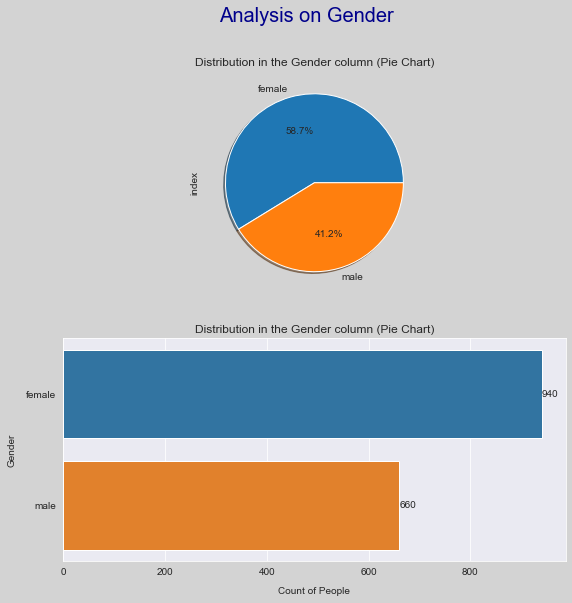

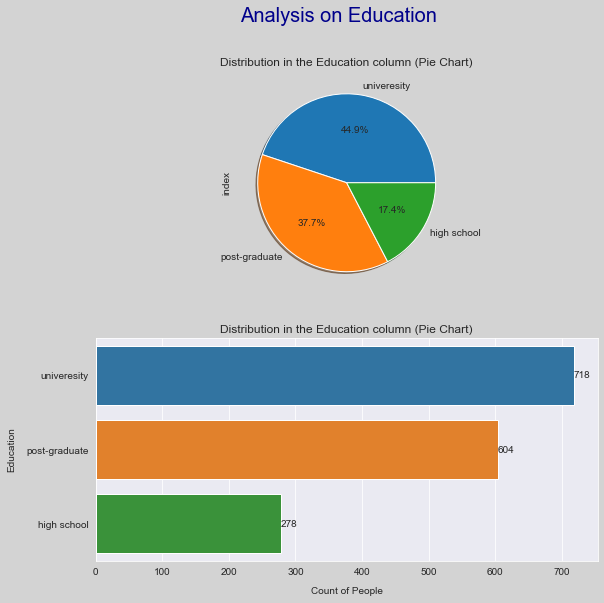

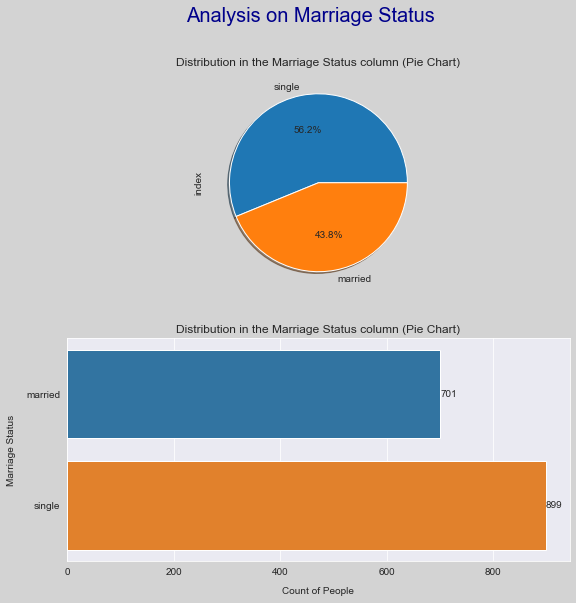

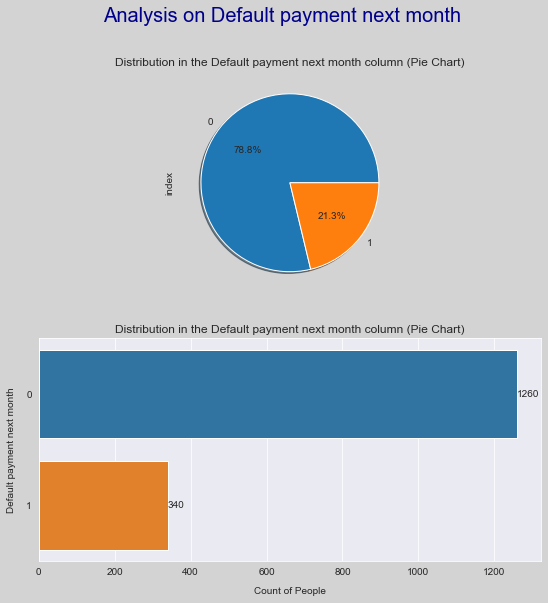

In [11]:
for feature in cat_features:
    catFunc.barPiePlot(feature)

<u><b>Things Observed</b></u>
- From the first graph , we can see that the dataset has a slightly higher proportion of female as compared to male at 41.2% as compared to 58.7%.
    - In addition, the countplot shows that female has over 800 rows while male contains    more than 600 rows
- From the second graph, we can see that has a higher proportion of university datas, at 37.7%
    - From the countplot, we can see that University data has over 700 rows in total
- From the third graph, we can see that a higher proportion of people are single at 56.2% and married at 43.8%.
    - From the countplot, we can see that single contains over 800 rows
- From the fourth graph, we can see that there is an imbalance of class where the output 0 occurs more than 78.8% of the time
    - From the countplot, this amounts to more than 1200 of class 0

Analysis on each column with `respect to target variable`

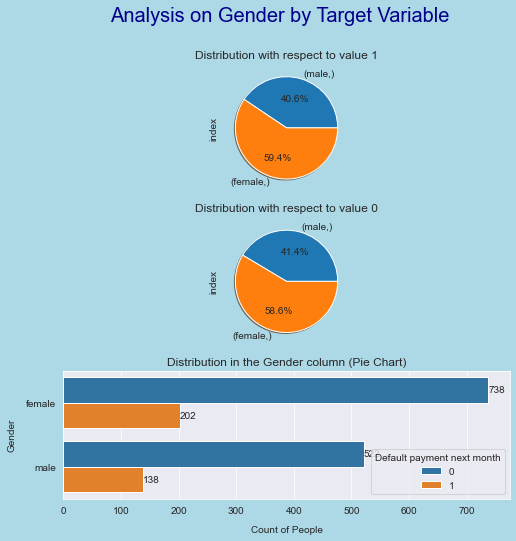

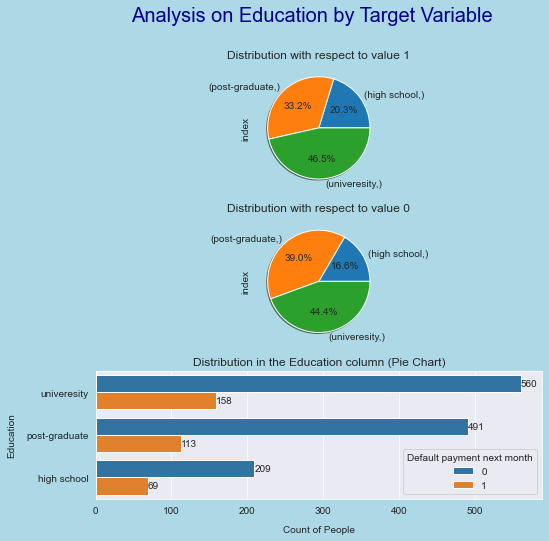

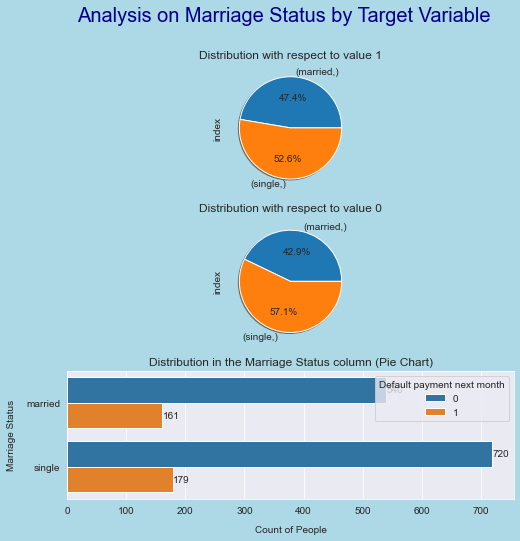

In [12]:
for col in cat_features[0:-1]:
    catFunc.plotByTarget(col)

<u><b>Things Observed</b></u>
- From the first graph of gender to default payment, we can see that female has a higher percentage of 59.4% with male at 40.6%
    - From the countplot, we can also see that there is a lower amount of total amount of people with default payment 1 

- From the second graph, we can see that university students has the highest percentage of people having classify as default payment 1 but this could be because university has the highest respondents in the dataset

- From the third graph, we can see that those that are single has a higher percentage of people  having default payment 1 similarly for default payment 0 but this could be due to higher respondents


#### Analysis on numerical features 

> Function for analysing numerical features

In [13]:
class numericAnalyser:
    def __init__(self):
        pass

    def numPlot(self, col):
        fig, ax = plt.subplots(2, 1, figsize=(9, 9))
        fig.suptitle('Analysis on Univaraite data',size=20,color='darkblue')
        fig.set_facecolor('lightgray')
        ax[0].title.set_text(f'Boxplot of {col}')
        ax[1].title.set_text(f'Distribution of {col}')
        sns.boxplot(x="Default payment next month", y=col, data=df,ax=ax[0])
        sns.histplot(x=col,
                     data=df,
                     stat='density',
                     bins=50,
                     kde=True,
                     line_kws={'color': 'red', 'linewidth': 3}, ax=ax[1])
        plt.show()
    def ratio(self,col1,col2,ax):
        ax.hist(df[col1],alpha=0.5,bins=10)
        ax.hist(df[col2],alpha=0.5,bins=10)
        ax.set_title(f'{col1} vs {col2}')
numFunc = numericAnalyser()

Retrive the `numerical` features in the dataset

In [14]:
num_features = [col for col in df.columns if col not in cat_features]
num_features

['Credit Limit',
 'Age',
 'Bill_Amount1',
 'Bill_Amount2',
 'Bill_Amount3',
 'Pay_Amount1',
 'Pay_Amount2',
 'Pay_Amount3']

Produce the graph for insights of the dataset

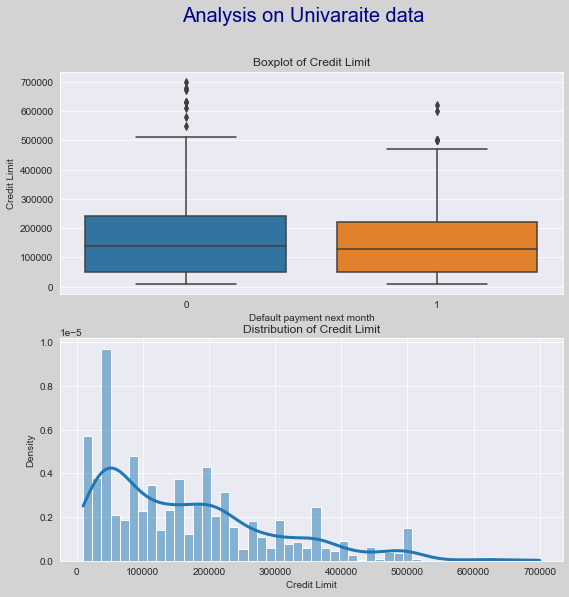

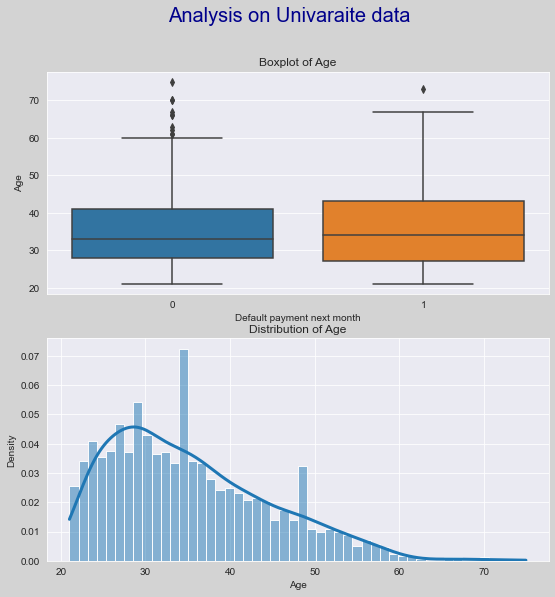

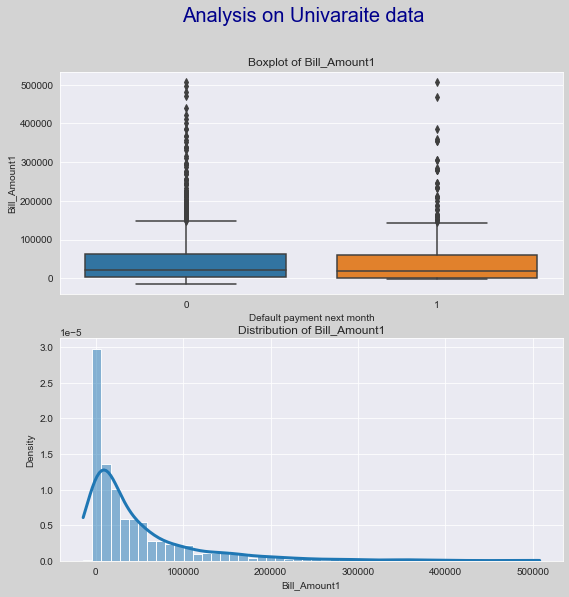

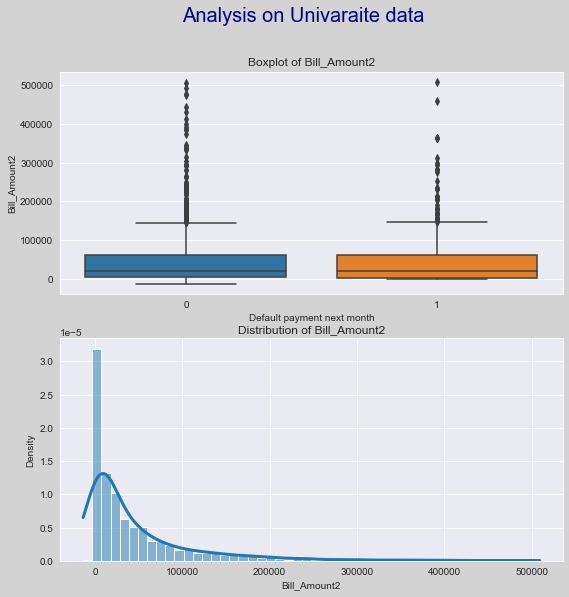

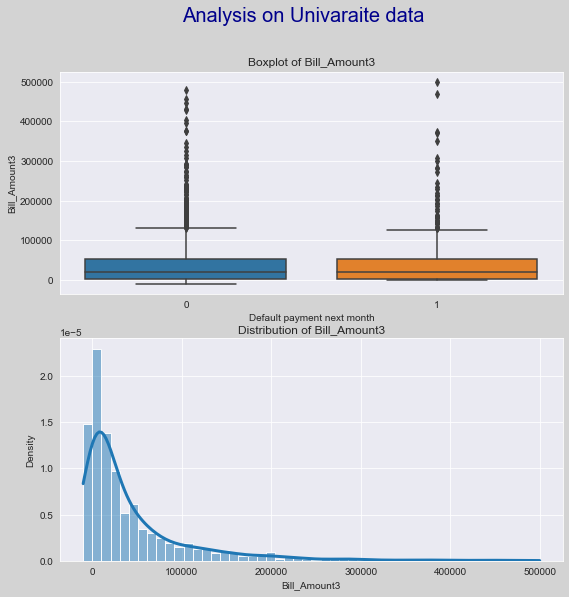

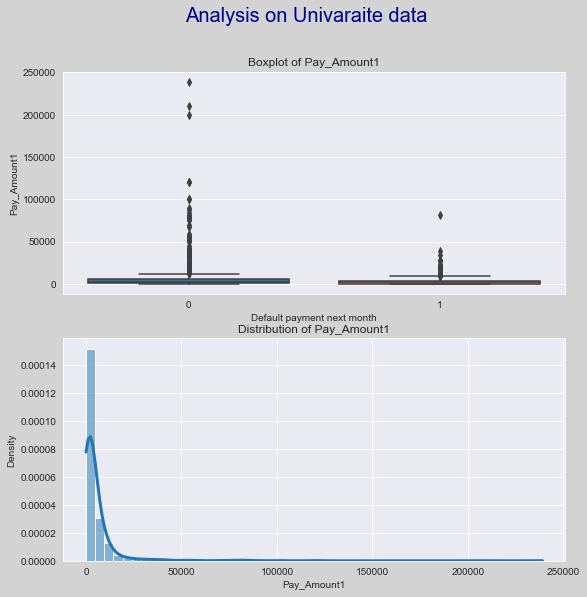

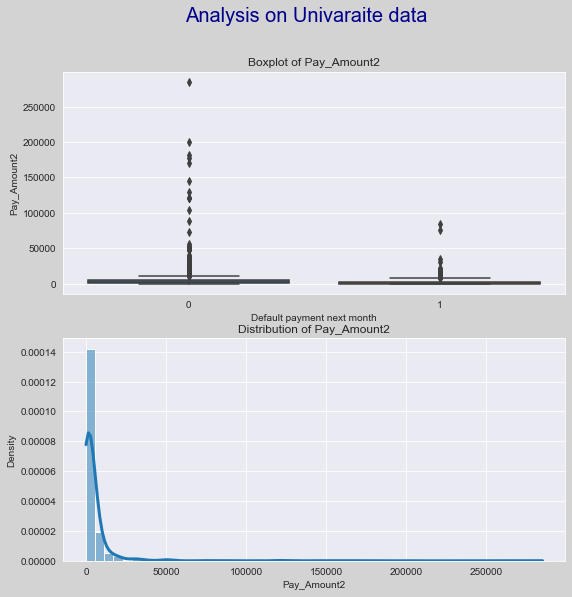

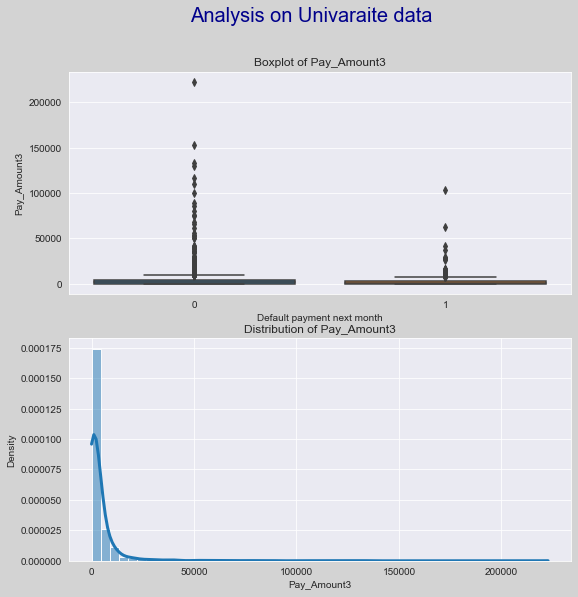

In [15]:
for col in num_features:
    numFunc.numPlot(col)

<u><b>Things Observed</b></u>
- From the first plot on credit limit, we can see that those who have default payment of 0 have a larger range and interquartile range as compared to those who have a default payment of 1 
    - From the histogram, we can see that it is positively skewed, with majority between the 10000 to 20000 range

- From the second plot on Age, we can see that those who have default payment of 0 have a smaller range and interquartile range as compared to those who have a default payment of 1
    - From the histogram, we can see that age is positively skewed with majority less than the age of 40

- From the plots on Bill Amount 1 to 3 month ago, we can see that those who have default payment of 0 have a wider range and interquartile range as compared to those who have a default payment of 1. Both contains numerous outliers
    - From the histograms, we can see that Bill Amount 1 to 3 is positively skewed with majority less than 10000
    - Also, there are negative values in bill amounts

- From the plots on Pay Amount 1 to 3 month ago, we can see that those who have default payment of 0 have a wider range and interquartile range as compared to those who have a default payment of 1. Both contains numerous outliers
    - From the histograms, we can see that Pay Amount 1 to 3 is positively skewed with majority less than around 3000

#### Analysis on pay vs bill

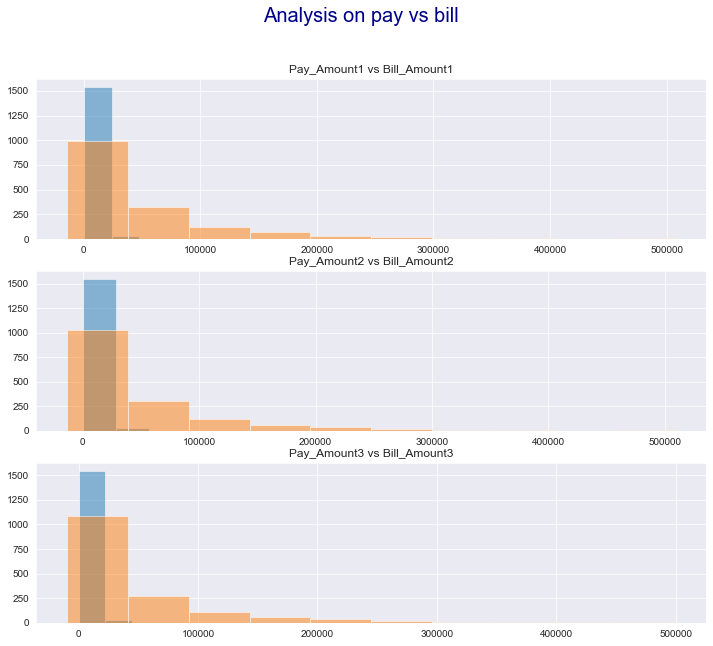

In [16]:
col1s = [f'Pay_Amount{i}' for i in range(1,4)]
col2s = [f'Bill_Amount{i}' for i in range(1,4)]
fig,ax = plt.subplots(3,1,figsize=(12,10))
fig.suptitle('Analysis on pay vs bill',size=20,color='darkblue')
index = 0
for col1,col2 in zip(col1s,col2s):
    ax[index] = numFunc.ratio(col1,col2,ax[index])
    index += 1

plt.show()

<u><b>Things Observed</b></u>
-  From the above graph, we can see that for all the pay amount are way less as compared to the bill amount which means that people are underpaying there bill which shows a small proportion is being paid each month

#### Check on the correlation and covariance between each variable

In [17]:
types = ['pearson','spearman','kendall']

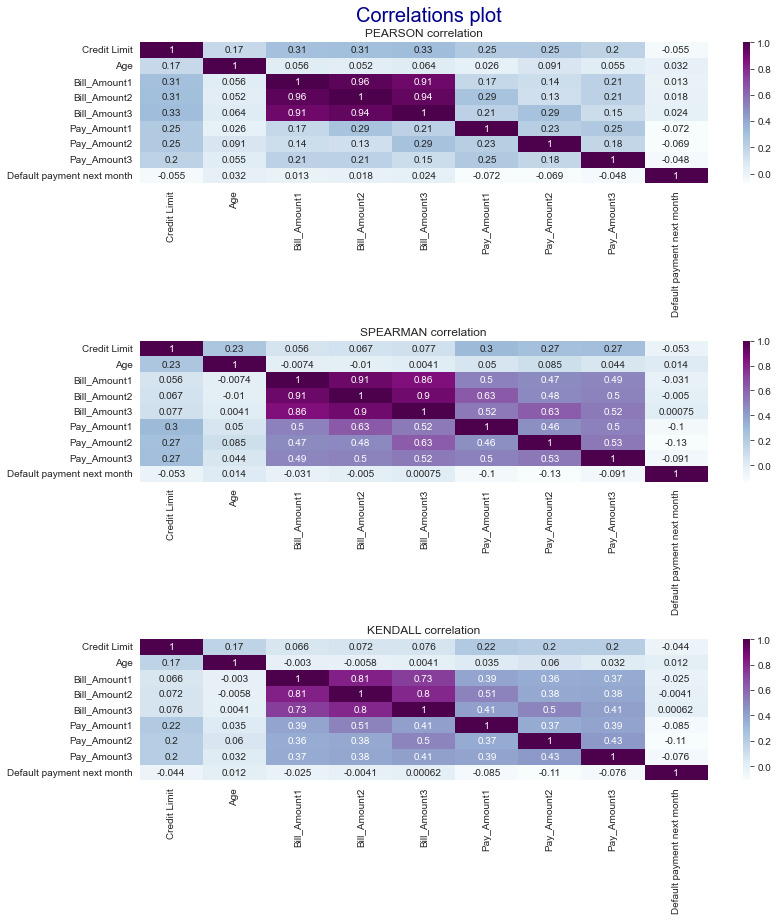

In [18]:
fig,ax = plt.subplots(3,1,figsize=(12,13))
fig.suptitle('Correlations plot',size=20,color='darkblue')
index = 0
for tp in types:
  # Create the graph and dataframe 
  ax[index].title.set_text(f'{tp.upper()} correlation')
  ax[index] = sns.heatmap(df.corr(method=tp), cmap="BuPu", annot=True,ax=ax[index])
  display(df.corr(method = tp).style.bar(color='green'))
  index +=1
plt.tight_layout()
plt.show()


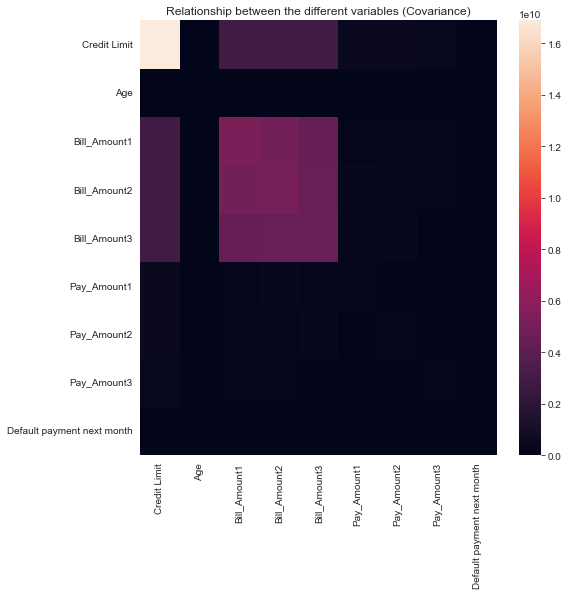

In [19]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
sns.heatmap(df.cov()).set(
    title="Relationship between the different variables (Covariance)")
plt.show()

<u><b>Things Observed</b></u>

- From the different types correlation plot, we observed that there is a strong relationship between bill amounts and pay amounts for different months
  - However, as bill amount 1 2 and 3 are variables that are dependent with each other, `multicollinearity is not found`

- From the covariance plot, observe a similar pattern and observe that there could be a relationship between credit limit and age too



#### Analysis on target variable

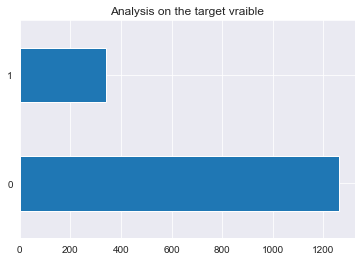

In [20]:
plt.title('Analysis on the target vraible',)
df['Default payment next month'].value_counts().plot(kind='barh')
plt.show()

<u><b>Things Observed</b></u>
- Here, there is an `imbalance` dataset in the target varable

#### Additional analysis with pandas profiling

In [21]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<u><b>Things Observed</b></u>
- Similar to correlation plot we can see high correlation between bill amounts however nothing to be concern as they are not independent variables

<a class="anchor" id="6"></a>
## <font color='#63B2CB'>__Feature Engineering__</font>

In [22]:
df = pd.read_csv('credit_dataset.csv')
df

Customer ID  Credit Limit  Gender      Education Marriage Status  Age  \
0               1         20000  female    univeresity         married   24   
1               2        120000  female    univeresity          single   26   
2               3         90000  female    univeresity          single   34   
3               4         50000  female    univeresity         married   37   
4               5         50000    male    univeresity         married   57   
...           ...           ...     ...            ...             ...  ...   
1595         1596        480000  female    univeresity         married   35   
1596         1597        150000  female    univeresity         married   37   
1597         1598        110000  female  post-graduate          single   29   
1598         1599        240000    male  post-graduate          single   30   
1599         1600         50000    male  post-graduate          single   33   

      Bill_Amount1  Bill_Amount2  Bill_Amount3  Pay_Amount1  Pay_Amount2  \
0             3913          3102           689            0          689   
1             2682          1725          2682            0         1000   
2            29239         14027         13559         1518         1500   
3            46990         48233         49291         2000         2019   
4             8617          5670         35835         2000        36681   
...            ...           ...           ...          ...          ...   
1595         18214         11031        182123            0       182123   
1596          1184           794          2756            0         2772   
1597        107195        109443        106637         7845         4000   
1598          7744          7284         11234         7305        11263   
1599         47853         49474         47822         2412         1500   

      Pay_Amount3  Default payment next month  
0               0                           1  
1            1000                           1  
2            1000                           0  
3            1200                           0  
4           10000                           0  
...           ...                         ...  
1595        12960                           0  
1596            0                           0  
1597         4000                           0  
1598        10018                           0  
1599          500                           1  

[1600 rows x 13 columns]

- From the above exploratory data analysis, I have come up with multiple possible features that can be extract

\begin{align*}
\text{Difference Between Pay and Bill} &= Pay - Bill
\end{align*}

\begin{align*}
\text{percentage of credit limit (pay)} &= \frac{Pay}{Credit Limit}\times{100}
\end{align*}

\begin{align*}
\text{percentage of credit limit (bill)} &= \frac{Pay}{Credit Limit}\times{100}
\end{align*}

\begin{align*}
\text{marriage and gender} &= marriage + gender
\end{align*}

\begin{align*}
\text{Difference from Mean E} &= Bill Amount - Mean(\text{Bill Amount by Education})
\end{align*}

\begin{align*}
\text{Difference from Mean A} &= Bill Amount - Mean(\text{Bill Amount by Age})
\end{align*}

> Function for feature extraction here

In [23]:
class FeatureExtraction():
    def __init__(self):
        pass
    def new_features(self,n:int):
      # Function for feature extraction
        for i in range(1,n):
            pass
            df[f'Difference_month{i}'] = df[f'Pay_Amount{i}'] - df[f'Bill_Amount{i}']
            df['MarriageGender'] = df['Marriage Status'] +' '+ df['Gender']
            df[f'per_of_pay_df_limit{i}'] = (df[f'Pay_Amount{i}'] / df[f'Credit Limit'])*100
            df[f'per_of_bill_df_limit{i}'] = (df[f'Bill_Amount{i}'] / df[f'Credit Limit'])*100
        
        # Mean by education
        mean = dict(df.groupby(by = 'Education').mean()['Credit Limit'])
        mean = dict(sorted(mean.items(), key=lambda x:x[1]))

        df['DifferenceMeanE'] = df['Credit Limit'] -  df["Education"].apply(lambda x: mean.get(x))

         # Mean by Gender
        mean = dict(df.groupby(by = 'Gender').mean()['Credit Limit'])
        mean = dict(sorted(mean.items(), key=lambda x:x[1]))

        df['DifferenceMeanG'] = df['Credit Limit'] -  df["Gender"].apply(lambda x: mean.get(x))
        
         # Mean by MarriageGender
        mean = dict(df.groupby(by = 'MarriageGender').mean()['Credit Limit'])
        mean = dict(sorted(mean.items(), key=lambda x:x[1]))

        df['DifferenceMeanMG'] = df['Credit Limit'] -  df["MarriageGender"].apply(lambda x: mean.get(x))
        return df
featureFunc = FeatureExtraction()


In [24]:
featureFunc.new_features(4)

Customer ID  Credit Limit  Gender      Education Marriage Status  Age  \
0               1         20000  female    univeresity         married   24   
1               2        120000  female    univeresity          single   26   
2               3         90000  female    univeresity          single   34   
3               4         50000  female    univeresity         married   37   
4               5         50000    male    univeresity         married   57   
...           ...           ...     ...            ...             ...  ...   
1595         1596        480000  female    univeresity         married   35   
1596         1597        150000  female    univeresity         married   37   
1597         1598        110000  female  post-graduate          single   29   
1598         1599        240000    male  post-graduate          single   30   
1599         1600         50000    male  post-graduate          single   33   

      Bill_Amount1  Bill_Amount2  Bill_Amount3  Pay_Amount1  ...  \
0             3913          3102           689            0  ...   
1             2682          1725          2682            0  ...   
2            29239         14027         13559         1518  ...   
3            46990         48233         49291         2000  ...   
4             8617          5670         35835         2000  ...   
...            ...           ...           ...          ...  ...   
1595         18214         11031        182123            0  ...   
1596          1184           794          2756            0  ...   
1597        107195        109443        106637         7845  ...   
1598          7744          7284         11234         7305  ...   
1599         47853         49474         47822         2412  ...   

      per_of_bill_df_limit1  Difference_month2  per_of_pay_df_limit2  \
0                 19.565000              -2413              3.445000   
1                  2.235000               -725              0.833333   
2                 32.487778             -12527              1.666667   
3                 93.980000             -46214              4.038000   
4                 17.234000              31011             73.362000   
...                     ...                ...                   ...   
1595               3.794583             171092             37.942292   
1596               0.789333               1978              1.848000   
1597              97.450000            -105443              3.636364   
1598               3.226667               3979              4.692917   
1599              95.706000             -47974              3.000000   

      per_of_bill_df_limit2 Difference_month3  per_of_pay_df_limit3  \
0                 15.510000              -689              0.000000   
1                  1.437500             -1682              0.833333   
2                 15.585556            -12559              1.111111   
3                 96.466000            -48091              2.400000   
4                 11.340000            -25835             20.000000   
...                     ...               ...                   ...   
1595               2.298125           -169163              2.700000   
1596               0.529333             -2756              0.000000   
1597              99.493636           -102637              3.636364   
1598               3.035000             -1216              4.174167   
1599              98.948000            -47322              1.000000   

      per_of_bill_df_limit3  DifferenceMeanE  DifferenceMeanG  \
0                  3.445000   -131643.454039   -149414.893617   
1                  2.235000    -31643.454039    -49414.893617   
2                 15.065556    -61643.454039    -79414.893617   
3                 98.582000   -101643.454039   -119414.893617   
4                 71.670000   -101643.454039   -113045.454545   
...                     ...              ...              ...   
1595              37.942292    328356.545961    310585.106383   
15

#### Feature selection 

- Drop customer id due to no importance in the dataset

In [25]:
df = df.drop('Customer ID',axis=1)
display(df)

Credit Limit  Gender      Education Marriage Status  Age  Bill_Amount1  \
0            20000  female    univeresity         married   24          3913   
1           120000  female    univeresity          single   26          2682   
2            90000  female    univeresity          single   34         29239   
3            50000  female    univeresity         married   37         46990   
4            50000    male    univeresity         married   57          8617   
...            ...     ...            ...             ...  ...           ...   
1595        480000  female    univeresity         married   35         18214   
1596        150000  female    univeresity         married   37          1184   
1597        110000  female  post-graduate          single   29        107195   
1598        240000    male  post-graduate          single   30          7744   
1599         50000    male  post-graduate          single   33         47853   

      Bill_Amount2  Bill_Amount3  Pay_Amount1  Pay_Amount2  ...  \
0             3102           689            0          689  ...   
1             1725          2682            0         1000  ...   
2            14027         13559         1518         1500  ...   
3            48233         49291         2000         2019  ...   
4             5670         35835         2000        36681  ...   
...            ...           ...          ...          ...  ...   
1595         11031        182123            0       182123  ...   
1596           794          2756            0         2772  ...   
1597        109443        106637         7845         4000  ...   
1598          7284         11234         7305        11263  ...   
1599         49474         47822         2412         1500  ...   

      per_of_bill_df_limit1  Difference_month2  per_of_pay_df_limit2  \
0                 19.565000              -2413              3.445000   
1                  2.235000               -725              0.833333   
2                 32.487778             -12527              1.666667   
3                 93.980000             -46214              4.038000   
4                 17.234000              31011             73.362000   
...                     ...                ...                   ...   
1595               3.794583             171092             37.942292   
1596               0.789333               1978              1.848000   
1597              97.450000            -105443              3.636364   
1598               3.226667               3979              4.692917   
1599              95.706000             -47974              3.000000   

     per_of_bill_df_limit2  Difference_month3  per_of_pay_df_limit3  \
0                15.510000               -689              0.000000   
1                 1.437500              -1682              0.833333   
2                15.585556             -12559              1.111111   
3                96.466000             -48091              2.400000   
4                11.340000             -25835             20.000000   
...                    ...                ...                   ...   
1595              2.298125            -169163              2.700000   
1596              0.529333              -2756              0.000000   
1597             99.493636            -102637              3.636364   
1598              3.035000              -1216              4.174167   
1599             98.948000             -47322              1.000000   

      per_of_bill_df_limit3  DifferenceMeanE  DifferenceMeanG  \
0                  3.445000   -131643.454039   -149414.893617   
1                  2.235000    -31643.454039    -49414.893617   
2                 15.065556    -61643.454039    -79414.893617   
3                 98.582000   -101643.454039   -119414.893617   
4                 71.670000   -101643.454039   -113045.454545   
...                     ...              ...              ...   
1595              37.942292    328356.545961    310585.106383   
15

#### Rows Selection
- As we observed from exploratory data analysis, we can see that there are bill amounts that are less than 0 and that the default payment is 0 so that we do not affect the minority class

In [26]:
df = df[~((df['Bill_Amount3'] <= 0) & (df['Bill_Amount2'] <= 0) &(df['Bill_Amount1'] <= 0) & (df['Default payment next month'] == 0))]
df=df.reset_index().drop('index', axis = 1)
df

Credit Limit  Gender      Education Marriage Status  Age  Bill_Amount1  \
0            20000  female    univeresity         married   24          3913   
1           120000  female    univeresity          single   26          2682   
2            90000  female    univeresity          single   34         29239   
3            50000  female    univeresity         married   37         46990   
4            50000    male    univeresity         married   57          8617   
...            ...     ...            ...             ...  ...           ...   
1543        480000  female    univeresity         married   35         18214   
1544        150000  female    univeresity         married   37          1184   
1545        110000  female  post-graduate          single   29        107195   
1546        240000    male  post-graduate          single   30          7744   
1547         50000    male  post-graduate          single   33         47853   

      Bill_Amount2  Bill_Amount3  Pay_Amount1  Pay_Amount2  ...  \
0             3102           689            0          689  ...   
1             1725          2682            0         1000  ...   
2            14027         13559         1518         1500  ...   
3            48233         49291         2000         2019  ...   
4             5670         35835         2000        36681  ...   
...            ...           ...          ...          ...  ...   
1543         11031        182123            0       182123  ...   
1544           794          2756            0         2772  ...   
1545        109443        106637         7845         4000  ...   
1546          7284         11234         7305        11263  ...   
1547         49474         47822         2412         1500  ...   

      per_of_bill_df_limit1  Difference_month2  per_of_pay_df_limit2  \
0                 19.565000              -2413              3.445000   
1                  2.235000               -725              0.833333   
2                 32.487778             -12527              1.666667   
3                 93.980000             -46214              4.038000   
4                 17.234000              31011             73.362000   
...                     ...                ...                   ...   
1543               3.794583             171092             37.942292   
1544               0.789333               1978              1.848000   
1545              97.450000            -105443              3.636364   
1546               3.226667               3979              4.692917   
1547              95.706000             -47974              3.000000   

     per_of_bill_df_limit2  Difference_month3  per_of_pay_df_limit3  \
0                15.510000               -689              0.000000   
1                 1.437500              -1682              0.833333   
2                15.585556             -12559              1.111111   
3                96.466000             -48091              2.400000   
4                11.340000             -25835             20.000000   
...                    ...                ...                   ...   
1543              2.298125            -169163              2.700000   
1544              0.529333              -2756              0.000000   
1545             99.493636            -102637              3.636364   
1546              3.035000              -1216              4.174167   
1547             98.948000             -47322              1.000000   

      per_of_bill_df_limit3  DifferenceMeanE  DifferenceMeanG  \
0                  3.445000   -131643.454039   -149414.893617   
1                  2.235000    -31643.454039    -49414.893617   
2                 15.065556    -61643.454039    -79414.893617   
3                 98.582000   -101643.454039   -119414.893617   
4                 71.670000   -101643.454039   -113045.454545   
...                     ...              ...              ...   
1543              37.942292    328356.545961    310585.106383   
15

Create a original dataframe for furture comparison

In [27]:
original_df = pd.read_csv('credit_dataset.csv')
original_df = original_df.drop('Customer ID',axis=1)
original_df

Credit Limit  Gender      Education Marriage Status  Age  Bill_Amount1  \
0            20000  female    univeresity         married   24          3913   
1           120000  female    univeresity          single   26          2682   
2            90000  female    univeresity          single   34         29239   
3            50000  female    univeresity         married   37         46990   
4            50000    male    univeresity         married   57          8617   
...            ...     ...            ...             ...  ...           ...   
1595        480000  female    univeresity         married   35         18214   
1596        150000  female    univeresity         married   37          1184   
1597        110000  female  post-graduate          single   29        107195   
1598        240000    male  post-graduate          single   30          7744   
1599         50000    male  post-graduate          single   33         47853   

      Bill_Amount2  Bill_Amount3  Pay_Amount1  Pay_Amount2  Pay_Amount3  \
0             3102           689            0          689            0   
1             1725          2682            0         1000         1000   
2            14027         13559         1518         1500         1000   
3            48233         49291         2000         2019         1200   
4             5670         35835         2000        36681        10000   
...            ...           ...          ...          ...          ...   
1595         11031        182123            0       182123        12960   
1596           794          2756            0         2772            0   
1597        109443        106637         7845         4000         4000   
1598          7284         11234         7305        11263        10018   
1599         49474         47822         2412         1500          500   

      Default payment next month  
0                              1  
1                              1  
2                              0  
3                              0  
4                              0  
...                          ...  
1595                           0  
1596                           0  
1597                           0  
1598                           0  
1599                           1  

[1600 rows x 12 columns]

<a class="anchor" id="7"></a>
## <font color='#63B2CB'>__Data Preprocessing__</font>

Answeing to `  Did you process the features in any way? `

#### Encoding for those that are categorical data

In [28]:
df_encode = df.copy()

- One Hot encoding
- Label encoder
- Ordinal Encoder
- Custom Encoding

Here we will encode those that are for ordinal encoding
- Marraige status has only two different unique values
- Gender has two unique values only

In [29]:
oe = OrdinalEncoder()
df_encode['Marriage Statu'] = oe.fit_transform(df_encode[['Marriage Status']])
pd.DataFrame(df_encode)

Credit Limit  Gender      Education Marriage Status  Age  Bill_Amount1  \
0            20000  female    univeresity         married   24          3913   
1           120000  female    univeresity          single   26          2682   
2            90000  female    univeresity          single   34         29239   
3            50000  female    univeresity         married   37         46990   
4            50000    male    univeresity         married   57          8617   
...            ...     ...            ...             ...  ...           ...   
1543        480000  female    univeresity         married   35         18214   
1544        150000  female    univeresity         married   37          1184   
1545        110000  female  post-graduate          single   29        107195   
1546        240000    male  post-graduate          single   30          7744   
1547         50000    male  post-graduate          single   33         47853   

      Bill_Amount2  Bill_Amount3  Pay_Amount1  Pay_Amount2  ...  \
0             3102           689            0          689  ...   
1             1725          2682            0         1000  ...   
2            14027         13559         1518         1500  ...   
3            48233         49291         2000         2019  ...   
4             5670         35835         2000        36681  ...   
...            ...           ...          ...          ...  ...   
1543         11031        182123            0       182123  ...   
1544           794          2756            0         2772  ...   
1545        109443        106637         7845         4000  ...   
1546          7284         11234         7305        11263  ...   
1547         49474         47822         2412         1500  ...   

      Difference_month2  per_of_pay_df_limit2  per_of_bill_df_limit2  \
0                 -2413              3.445000              15.510000   
1                  -725              0.833333               1.437500   
2                -12527              1.666667              15.585556   
3                -46214              4.038000              96.466000   
4                 31011             73.362000              11.340000   
...                 ...                   ...                    ...   
1543             171092             37.942292               2.298125   
1544               1978              1.848000               0.529333   
1545            -105443              3.636364              99.493636   
1546               3979              4.692917               3.035000   
1547             -47974              3.000000              98.948000   

     Difference_month3  per_of_pay_df_limit3  per_of_bill_df_limit3  \
0                 -689              0.000000               3.445000   
1                -1682              0.833333               2.235000   
2               -12559              1.111111              15.065556   
3               -48091              2.400000              98.582000   
4               -25835             20.000000              71.670000   
...                ...                   ...                    ...   
1543           -169163              2.700000              37.942292   
1544             -2756              0.000000               1.837333   
1545           -102637              3.636364              96.942727   
1546             -1216              4.174167               4.680833   
1547            -47322              1.000000              95.644000   

      DifferenceMeanE  DifferenceMeanG  DifferenceMeanMG  Marriage Statu  
0      -131643.454039   -149414.893617    -163417.431193             0.0  
1       -31643.454039    -49414.893617     -37301.587302             1.0  
2       -61643.454039    -79414.893617     -67301.587302             1.0  
3      -101643.454039   -119414.893617    -133417.431193             0.0  
4      -101643.454039   -113045.454545    -131207.547170             0.0  
...               ...              ...               ...             ...

In [30]:
oe = OrdinalEncoder()
df_encode['Gender'] = oe.fit_transform(df_encode[['Gender']])
pd.DataFrame(df_encode)

Credit Limit  Gender      Education Marriage Status  Age  Bill_Amount1  \
0            20000     0.0    univeresity         married   24          3913   
1           120000     0.0    univeresity          single   26          2682   
2            90000     0.0    univeresity          single   34         29239   
3            50000     0.0    univeresity         married   37         46990   
4            50000     1.0    univeresity         married   57          8617   
...            ...     ...            ...             ...  ...           ...   
1543        480000     0.0    univeresity         married   35         18214   
1544        150000     0.0    univeresity         married   37          1184   
1545        110000     0.0  post-graduate          single   29        107195   
1546        240000     1.0  post-graduate          single   30          7744   
1547         50000     1.0  post-graduate          single   33         47853   

      Bill_Amount2  Bill_Amount3  Pay_Amount1  Pay_Amount2  ...  \
0             3102           689            0          689  ...   
1             1725          2682            0         1000  ...   
2            14027         13559         1518         1500  ...   
3            48233         49291         2000         2019  ...   
4             5670         35835         2000        36681  ...   
...            ...           ...          ...          ...  ...   
1543         11031        182123            0       182123  ...   
1544           794          2756            0         2772  ...   
1545        109443        106637         7845         4000  ...   
1546          7284         11234         7305        11263  ...   
1547         49474         47822         2412         1500  ...   

      Difference_month2  per_of_pay_df_limit2  per_of_bill_df_limit2  \
0                 -2413              3.445000              15.510000   
1                  -725              0.833333               1.437500   
2                -12527              1.666667              15.585556   
3                -46214              4.038000              96.466000   
4                 31011             73.362000              11.340000   
...                 ...                   ...                    ...   
1543             171092             37.942292               2.298125   
1544               1978              1.848000               0.529333   
1545            -105443              3.636364              99.493636   
1546               3979              4.692917               3.035000   
1547             -47974              3.000000              98.948000   

     Difference_month3  per_of_pay_df_limit3  per_of_bill_df_limit3  \
0                 -689              0.000000               3.445000   
1                -1682              0.833333               2.235000   
2               -12559              1.111111              15.065556   
3               -48091              2.400000              98.582000   
4               -25835             20.000000              71.670000   
...                ...                   ...                    ...   
1543           -169163              2.700000              37.942292   
1544             -2756              0.000000               1.837333   
1545           -102637              3.636364              96.942727   
1546             -1216              4.174167               4.680833   
1547            -47322              1.000000              95.644000   

      DifferenceMeanE  DifferenceMeanG  DifferenceMeanMG  Marriage Statu  
0      -131643.454039   -149414.893617    -163417.431193             0.0  
1       -31643.454039    -49414.893617     -37301.587302             1.0  
2       -61643.454039    -79414.893617     -67301.587302             1.0  
3      -101643.454039   -119414.893617    -133417.431193             0.0  
4      -101643.454039   -113045.454545    -131207.547170             0.0  
...               ...              ...               ...             ...

Here we will create a class for custom encoding
- For education, education status result in less likely to default payment due to regular income

In [31]:
class CustomEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        encoded_values = []
        for value in X:
            if value == 'high school':
                encoded_values.append([0])
            elif value == 'university':
                encoded_values.append([1])
            else:
                encoded_values.append([2])
        return np.array(encoded_values)

    def fit_transform(self, X, y=None):
        return self.transform(X)
custom_encoder = CustomEncoder()

In [32]:
df_encode['Education'] = custom_encoder.fit_transform(df_encode['Education'])
df_encode

Credit Limit  Gender  Education Marriage Status  Age  Bill_Amount1  \
0            20000     0.0          2         married   24          3913   
1           120000     0.0          2          single   26          2682   
2            90000     0.0          2          single   34         29239   
3            50000     0.0          2         married   37         46990   
4            50000     1.0          2         married   57          8617   
...            ...     ...        ...             ...  ...           ...   
1543        480000     0.0          2         married   35         18214   
1544        150000     0.0          2         married   37          1184   
1545        110000     0.0          2          single   29        107195   
1546        240000     1.0          2          single   30          7744   
1547         50000     1.0          2          single   33         47853   

      Bill_Amount2  Bill_Amount3  Pay_Amount1  Pay_Amount2  ...  \
0             3102           689            0          689  ...   
1             1725          2682            0         1000  ...   
2            14027         13559         1518         1500  ...   
3            48233         49291         2000         2019  ...   
4             5670         35835         2000        36681  ...   
...            ...           ...          ...          ...  ...   
1543         11031        182123            0       182123  ...   
1544           794          2756            0         2772  ...   
1545        109443        106637         7845         4000  ...   
1546          7284         11234         7305        11263  ...   
1547         49474         47822         2412         1500  ...   

      Difference_month2  per_of_pay_df_limit2  per_of_bill_df_limit2  \
0                 -2413              3.445000              15.510000   
1                  -725              0.833333               1.437500   
2                -12527              1.666667              15.585556   
3                -46214              4.038000              96.466000   
4                 31011             73.362000              11.340000   
...                 ...                   ...                    ...   
1543             171092             37.942292               2.298125   
1544               1978              1.848000               0.529333   
1545            -105443              3.636364              99.493636   
1546               3979              4.692917               3.035000   
1547             -47974              3.000000              98.948000   

     Difference_month3  per_of_pay_df_limit3  per_of_bill_df_limit3  \
0                 -689              0.000000               3.445000   
1                -1682              0.833333               2.235000   
2               -12559              1.111111              15.065556   
3               -48091              2.400000              98.582000   
4               -25835             20.000000              71.670000   
...                ...                   ...                    ...   
1543           -169163              2.700000              37.942292   
1544             -2756              0.000000               1.837333   
1545           -102637              3.636364              96.942727   
1546             -1216              4.174167               4.680833   
1547            -47322              1.000000              95.644000   

      DifferenceMeanE  DifferenceMeanG  DifferenceMeanMG  Marriage Statu  
0      -131643.454039   -149414.893617    -163417.431193             0.0  
1       -31643.454039    -49414.893617     -37301.587302             1.0  
2       -61643.454039    -79414.893617     -67301.587302             1.0  
3      -101643.454039   -119414.893617    -133417.431193             0.0  
4      -101643.454039   -113045.454545    -131207.547170             0.0  
...               ...              ...               ...             ...  
1543    328356.545961    310585.106383     29

- Above are the final encoded section

#### Create the target variable and the features

- Here the target variable is Default payment next month hence y will contain just that while x will contain other variales

In [33]:
X = df.drop(['Default payment next month'],axis=1)
y = df['Default payment next month']
X

Credit Limit  Gender      Education Marriage Status  Age  Bill_Amount1  \
0            20000  female    univeresity         married   24          3913   
1           120000  female    univeresity          single   26          2682   
2            90000  female    univeresity          single   34         29239   
3            50000  female    univeresity         married   37         46990   
4            50000    male    univeresity         married   57          8617   
...            ...     ...            ...             ...  ...           ...   
1543        480000  female    univeresity         married   35         18214   
1544        150000  female    univeresity         married   37          1184   
1545        110000  female  post-graduate          single   29        107195   
1546        240000    male  post-graduate          single   30          7744   
1547         50000    male  post-graduate          single   33         47853   

      Bill_Amount2  Bill_Amount3  Pay_Amount1  Pay_Amount2  ...  \
0             3102           689            0          689  ...   
1             1725          2682            0         1000  ...   
2            14027         13559         1518         1500  ...   
3            48233         49291         2000         2019  ...   
4             5670         35835         2000        36681  ...   
...            ...           ...          ...          ...  ...   
1543         11031        182123            0       182123  ...   
1544           794          2756            0         2772  ...   
1545        109443        106637         7845         4000  ...   
1546          7284         11234         7305        11263  ...   
1547         49474         47822         2412         1500  ...   

      per_of_bill_df_limit1  Difference_month2 per_of_pay_df_limit2  \
0                 19.565000              -2413             3.445000   
1                  2.235000               -725             0.833333   
2                 32.487778             -12527             1.666667   
3                 93.980000             -46214             4.038000   
4                 17.234000              31011            73.362000   
...                     ...                ...                  ...   
1543               3.794583             171092            37.942292   
1544               0.789333               1978             1.848000   
1545              97.450000            -105443             3.636364   
1546               3.226667               3979             4.692917   
1547              95.706000             -47974             3.000000   

      per_of_bill_df_limit2  Difference_month3  per_of_pay_df_limit3  \
0                 15.510000               -689              0.000000   
1                  1.437500              -1682              0.833333   
2                 15.585556             -12559              1.111111   
3                 96.466000             -48091              2.400000   
4                 11.340000             -25835             20.000000   
...                     ...                ...                   ...   
1543               2.298125            -169163              2.700000   
1544               0.529333              -2756              0.000000   
1545              99.493636            -102637              3.636364   
1546               3.035000              -1216              4.174167   
1547              98.948000             -47322              1.000000   

      per_of_bill_df_limit3  DifferenceMeanE  DifferenceMeanG  \
0                  3.445000   -131643.454039   -149414.893617   
1                  2.235000    -31643.454039    -49414.893617   
2                 15.065556    -61643.454039    -79414.893617   
3                 98.582000   -101643.454039   -119414.893617   
4                 71.670000   -101643.454039   -113045.454545   
...                     ...              ...              ...   
1543              37.942292    328356.545961    310585.106383   
15

- Here we will do the same to the original dataset

In [34]:
X_original = original_df.drop('Default payment next month',axis=1)
y_original = original_df['Default payment next month']

#### Split the dataset into train and test

- Set the train test split for data that `have not been` feature engineered

In [35]:
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original, y_original, test_size=.2, stratify=y_original, shuffle=True,random_state = 32)

- Set the train test split for data that `have been` feature engineered

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, shuffle=True,random_state = 32)

<a class="anchor" id="8"></a>
## <font color='#63B2CB'>__Pipeline Building__ (Basline)</font>

- Get the numeric features on data that `have not been` feature engineered

In [37]:
num_features_original = [col for col in X_train_original.columns if str(original_df[col].dtype) != 'object']
num_features_original

['Credit Limit',
 'Age',
 'Bill_Amount1',
 'Bill_Amount2',
 'Bill_Amount3',
 'Pay_Amount1',
 'Pay_Amount2',
 'Pay_Amount3']

- Get the numeric features on data that `have been` feature engineered

In [38]:
num_features = [ col for col in df.columns if str(df[col].dtype) != 'object']
num_features.remove('Default payment next month')
print(num_features)

['Credit Limit', 'Age', 'Bill_Amount1', 'Bill_Amount2', 'Bill_Amount3', 'Pay_Amount1', 'Pay_Amount2', 'Pay_Amount3', 'Difference_month1', 'per_of_pay_df_limit1', 'per_of_bill_df_limit1', 'Difference_month2', 'per_of_pay_df_limit2', 'per_of_bill_df_limit2', 'Difference_month3', 'per_of_pay_df_limit3', 'per_of_bill_df_limit3', 'DifferenceMeanE', 'DifferenceMeanG', 'DifferenceMeanMG']


> Functions for pipeline building 
- Nunmeric value fo scaled using `Normaliser`

In [39]:
class pipeline:
    def __init__(self):
        pass

    def pipeline_step(self, original, num_features):
      # Numeric transformer for numeric values
        numeric_transformer = Pipeline([("imputer", SimpleImputer(
            strategy="median")), ('scaler', Normalizer())])
        
        # Categorical transformer for ordinal encoding
        categorical_transformer = Pipeline([("imputer", SimpleImputer(
            strategy='most_frequent')),
            ('oe', OrdinalEncoder())])
        
        # Customer encoder
        categorical_transformer2 = Pipeline([("imputer", SimpleImputer(
            strategy='most_frequent')),
            ('custom',  CustomEncoder())])
        
        # One hot encoding
        categorical_transformer3 = Pipeline([("imputer", SimpleImputer(
            strategy='most_frequent')),
            ('ohe', OneHotEncoder())])
        
        # original and not original preporcessing step
        if original:
            preprocessing_step = ColumnTransformer(
                [
                    ("numeric", numeric_transformer, num_features),
                    ('oe', categorical_transformer,
                     ['Marriage Status', 'Gender']),
                    ('custom_e', categorical_transformer2, ['Education']),
                ],
                remainder="passthrough",
            )
        else:
            preprocessing_step = ColumnTransformer(
                [
                    ("numeric", numeric_transformer, num_features),
                    ('oe', categorical_transformer,
                     ['Marriage Status', 'Gender']),
                    ('custom_e', categorical_transformer2, ['Education']),
                    ('ohe', categorical_transformer3, ['MarriageGender'])
                ],
                remainder="passthrough",
            )
        process = [('preprocessing', preprocessing_step)]
        return process




p = pipeline()


- Generate the pipeline for `original` data

In [40]:
pipeline_step_original = p.pipeline_step(True,num_features_original)
pipeline_step_original

[('preprocessing',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('numeric',
                                   Pipeline(steps=[('imputer',
                                                    SimpleImputer(strategy='median')),
                                                   ('scaler', Normalizer())]),
                                   ['Credit Limit', 'Age', 'Bill_Amount1',
                                    'Bill_Amount2', 'Bill_Amount3', 'Pay_Amount1',
                                    'Pay_Amount2', 'Pay_Amount3']),
                                  ('oe',
                                   Pipeline(steps=[('imputer',
                                                    SimpleImputer(strategy='most_frequent')),
                                                   ('oe', OrdinalEncoder())]),
                                   ['Marriage Status', 'Gender']),
                                  ('custom_e',
                                   Pipeline(

- Generate the pipeline for `original` data

In [41]:
pipeline_step = p.pipeline_step(False,num_features)
pipeline_step

[('preprocessing',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('numeric',
                                   Pipeline(steps=[('imputer',
                                                    SimpleImputer(strategy='median')),
                                                   ('scaler', Normalizer())]),
                                   ['Credit Limit', 'Age', 'Bill_Amount1',
                                    'Bill_Amount2', 'Bill_Amount3', 'Pay_Amount1',
                                    'Pay_Amount2', 'Pay_Amount3',
                                    'Difference_month1', 'per_of_pay_df_limit1',
                                    'per_of_bill_df_limit1', 'Difference_month2',
                                    '...
                                   Pipeline(steps=[('imputer',
                                                    SimpleImputer(strategy='most_frequent')),
                                                   ('oe', OrdinalEncoder())]

<a class="anchor" id="8"></a>
## <font color='#63B2CB'> __Model (Baseline)__</font>

- Here we will do a baseline model across different types of machine learning algorithm

In [42]:
class model:
    def __init__(self):
        pass
   
    def plot_learning_curve(self, name, model,X,y,ax):
        train_sizes, train_scores, test_scores = learning_curve(
            estimator=model, X=X, y=y,   cv=StratifiedKFold(n_splits=10), train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)
        ax.set_ylim([-0.2,1.2])
        ax.plot(train_sizes, train_mean, color='blue', marker='o',
                markersize=5, label='Training Accuracy')
        ax.plot(train_sizes, test_mean, color='green', marker='+',
                markersize=5, linestyle='--', label='Validation Accuracy')
        ax.set_title(f'Learning Curve {name}')
        ax.set_xlabel('Training Data Size')
        ax.set_ylabel('Model accuracy')
        ax.grid()
        ax.legend(loc='lower right')
modelFunc = model()

#### Setting the evluation metrics for classification model

In [43]:
evaluation = ["accuracy", "f1_weighted","recall", "precision","roc_auc"]
evaluation

['accuracy', 'f1_weighted', 'recall', 'precision', 'roc_auc']

- Setting the dataframe evaluation train and test

In [44]:
def dataframeColumns(keys):
    col = ['model','fit_time','score_time']
    for i in keys:
        col.append(f'test_{i}')
        col.append(f'train_{i}')
    return col
evaluation_col = (dataframeColumns(evaluation))  
evaluation_col

['model',
 'fit_time',
 'score_time',
 'test_accuracy',
 'train_accuracy',
 'test_f1_weighted',
 'train_f1_weighted',
 'test_recall',
 'train_recall',
 'test_precision',
 'train_precision',
 'test_roc_auc',
 'train_roc_auc']

#### Set the model

Answering to ` How did you select which learning algorithms to use?
`

- LogisticRegressionClf
  - Simple model for classification that is easy to be interpret and performs well when relationship are close to linear 
- KNeighborsClf
  - Simplest of all algorithms which labels the new data point base on its closest neighbours 
- DecisionTreeClf
  - Subdivide the feature space into with mostly the same label
  - Can capture linear and non linear relationship in both numerical and categorical datas
- ExtraTreesClf
  - Extra Trees is an ensemble method based on decision trees which  reduces overfitting by using randomization during the tree-building process.
- RandomForestClf
  - Ensemble method that combines multiple decision trees that  reduces overfitting and provides better generalization performance and high-dimensional data and capture non-linear relationships
- GradientBoostingClf,
  - Builds models sequentially, each correcting the mistakes of the previous model which can capture complex relationship
- HistGBClf
  - Variantof gradient boosting that uses histograms to speed up training whichcan handle large datasets and provides efficient training and prediction.
- AdaBoostClf
  - Ensemble method that combines multiple weak classifiers which  focuses on difficult-to-classify examples, improving overall accuracy
- SVC
 - Versatile classifier for binary and multi-class classification tasks which  can handle high-dimensional data and capture non-linear relationships using kernel tricks.
- Neural Network
   - Highly flexible and can learn complex patterns and relationships 


In [45]:
classification_models = {
    "LogisticRegressionClf": LogisticRegression(solver='newton-cg'),
    "KNeighborsClf": KNeighborsClassifier(),
    'DecisionTreeClf': DecisionTreeClassifier(),
    "ExtraTreesClf": ExtraTreesClassifier(),
    "RandomForestClf": RandomForestClassifier(class_weight={0: 1, 1: 10}),
    "GradientBoostingClf": GradientBoostingClassifier(),
    'HistGBClf': HistGradientBoostingClassifier(learning_rate=0.15),
    "AdaBoostClf": AdaBoostClassifier(),
    'SVC': SVC(),
    'Neural Network': MLPClassifier()
}

pipeline_step.append(0)
pipeline_step_original.append(0)


#### Testing against different models

In [46]:
def run_models(models,step,X,y,X_test,y_test):
  # Run the different models in a loop
    baseline_df = pd.DataFrame(columns = evaluation_col)
    i = 0 
    fig, ax = plt.subplots(2, 5, figsize=(15, 13))
    for model_name,model in models.items():
        step[-1] = ('clf',model)

        clf = Pipeline(steps=step)
        
        clf.fit(X, y)
        print(colored(model_name, 'green'),'is running')
        print(f"Model Accuracy Score :{clf.score(X, y)}")
        
        scores = cross_validate(clf,X,y,cv=StratifiedKFold(n_splits=10),scoring=evaluation,n_jobs=-1,return_train_score=True )

        display(pd.DataFrame(scores).mean())

        new_row = dict(pd.DataFrame(scores).mean())
        new_row.update({'model':model_name})
        
        baseline_df = baseline_df.append(new_row, ignore_index=True)
        fig.suptitle('Learning Curves')
        row = i // 5
        col = i % 5  
        modelFunc.plot_learning_curve(model_name,clf,X,y,ax=ax[row,col])
        i += 1
    plt.tight_layout()
    plt.show()
    return baseline_df


#### Dummy Classier

In [47]:
pipeline_step_original[-1] = ('dummy_model',DummyClassifier())
dummy_model = Pipeline(steps=pipeline_step_original)
dummy_model.fit(X_train_original, y_train_original)
print(colored('Dummy Classifier', 'green'),'is running')
print(f"Model Accuracy Score :{dummy_model.score(X, y)}")
scores = cross_validate(dummy_model,X_train_original,y_train_original,cv=StratifiedKFold(n_splits=10),scoring=evaluation,n_jobs=-1,return_train_score=True )
dummy_scores = pd.DataFrame(scores)
display(dummy_scores)

Dummy Classifier is running
Model Accuracy Score :0.7803617571059431


fit_time  score_time  test_accuracy  train_accuracy  test_f1_weighted  \
0  0.050014    0.043257       0.781250        0.788194          0.685307   
1  0.041651    0.051620       0.781250        0.788194          0.685307   
2  0.049652    0.050397       0.789062        0.787326          0.696029   
3  0.056395    0.044335       0.789062        0.787326          0.696029   
4  0.041651    0.051620       0.789062        0.787326          0.696029   
5  0.042008    0.053191       0.789062        0.787326          0.696029   
6  0.048257    0.039779       0.789062        0.787326          0.696029   
7  0.043079    0.050107       0.789062        0.787326          0.696029   
8  0.043371    0.038468       0.789062        0.787326          0.696029   
9  0.057717    0.043812       0.789062        0.787326          0.696029   

   train_f1_weighted  test_recall  train_recall  test_precision  \
0           0.694835          0.0           0.0             0.0   
1           0.694835          0.0           0.0             0.0   
2           0.693643          0.0           0.0             0.0   
3           0.693643          0.0           0.0             0.0   
4           0.693643          0.0           0.0             0.0   
5           0.693643          0.0           0.0             0.0   
6           0.693643          0.0           0.0             0.0   
7           0.693643          0.0           0.0             0.0   
8           0.693643          0.0           0.0             0.0   
9           0.693643          0.0           0.0             0.0   

   train_precision  test_roc_auc  train_roc_auc  
0              0.0           0.5            0.5  
1              0.0           0.5            0.5  
2              0.0           0.5            0.5  
3              0.0           0.5            0.5  
4              0.0           0.5            0.5  
5              0.0           0.5            0.5  
6              0.0           0.5            0.5  
7              0.0           0.5            0.5  
8              0.0           0.5            0.5  
9              0.0           0.5            0.5

- Run the different classification models

LogisticRegressionClf is running
Model Accuracy Score :0.7875


fit_time             0.059845
score_time           0.039869
test_accuracy        0.787500
train_accuracy       0.787500
test_f1_weighted     0.693885
train_f1_weighted    0.693881
test_recall          0.000000
train_recall         0.000000
test_precision       0.000000
train_precision      0.000000
test_roc_auc         0.598961
train_roc_auc        0.621523
dtype: float64

KNeighborsClf is running
Model Accuracy Score :0.80234375


fit_time             0.066732
score_time           0.064719
test_accuracy        0.743750
train_accuracy       0.804340
test_f1_weighted     0.692239
train_f1_weighted    0.763210
test_recall          0.073545
train_recall         0.205060
test_precision       0.199762
train_precision      0.622067
test_roc_auc         0.518264
train_roc_auc        0.797270
dtype: float64

DecisionTreeClf is running
Model Accuracy Score :1.0


fit_time             0.116591
score_time           0.046486
test_accuracy        0.689844
train_accuracy       1.000000
test_f1_weighted     0.696820
train_f1_weighted    1.000000
test_recall          0.353307
train_recall         1.000000
test_precision       0.306070
train_precision      1.000000
test_roc_auc         0.567030
train_roc_auc        1.000000
dtype: float64

ExtraTreesClf is running
Model Accuracy Score :1.0


fit_time             0.508161
score_time           0.079980
test_accuracy        0.753906
train_accuracy       1.000000
test_f1_weighted     0.699042
train_f1_weighted    1.000000
test_recall          0.073545
train_recall         1.000000
test_precision       0.270794
train_precision      1.000000
test_roc_auc         0.565895
train_roc_auc        1.000000
dtype: float64

RandomForestClf is running
Model Accuracy Score :1.0


fit_time             0.822828
score_time           0.078075
test_accuracy        0.782813
train_accuracy       1.000000
test_f1_weighted     0.713651
train_f1_weighted    1.000000
test_recall          0.066402
train_recall         1.000000
test_precision       0.439405
train_precision      1.000000
test_roc_auc         0.629723
train_roc_auc        1.000000
dtype: float64

GradientBoostingClf is running
Model Accuracy Score :0.84765625


fit_time             0.948991
score_time           0.037951
test_accuracy        0.769531
train_accuracy       0.855295
test_f1_weighted     0.700786
train_f1_weighted    0.825098
test_recall          0.047751
train_recall         0.327208
test_precision       0.302460
train_precision      0.976009
test_roc_auc         0.604972
train_roc_auc        0.945415
dtype: float64

HistGBClf is running
Model Accuracy Score :0.9953125


fit_time             0.712202
score_time           0.051473
test_accuracy        0.747656
train_accuracy       0.997743
test_f1_weighted     0.706290
train_f1_weighted    0.997737
test_recall          0.121561
train_recall         0.989378
test_precision       0.287313
train_precision      1.000000
test_roc_auc         0.590862
train_roc_auc        0.999990
dtype: float64

AdaBoostClf is running
Model Accuracy Score :0.80625


fit_time             0.411072
score_time           0.063789
test_accuracy        0.778125
train_accuracy       0.806510
test_f1_weighted     0.719513
train_f1_weighted    0.755501
test_recall          0.095635
train_recall         0.161758
test_precision       0.407698
train_precision      0.692614
test_roc_auc         0.621594
train_roc_auc        0.802146
dtype: float64

SVC is running
Model Accuracy Score :0.7875


fit_time             0.162378
score_time           0.080327
test_accuracy        0.787500
train_accuracy       0.787500
test_f1_weighted     0.693885
train_f1_weighted    0.693881
test_recall          0.000000
train_recall         0.000000
test_precision       0.000000
train_precision      0.000000
test_roc_auc         0.535359
train_roc_auc        0.627439
dtype: float64

Neural Network is running
Model Accuracy Score :0.7875


fit_time             1.380729
score_time           0.041353
test_accuracy        0.787500
train_accuracy       0.787500
test_f1_weighted     0.693885
train_f1_weighted    0.693881
test_recall          0.000000
train_recall         0.000000
test_precision       0.000000
train_precision      0.000000
test_roc_auc         0.601143
train_roc_auc        0.668570
dtype: float64

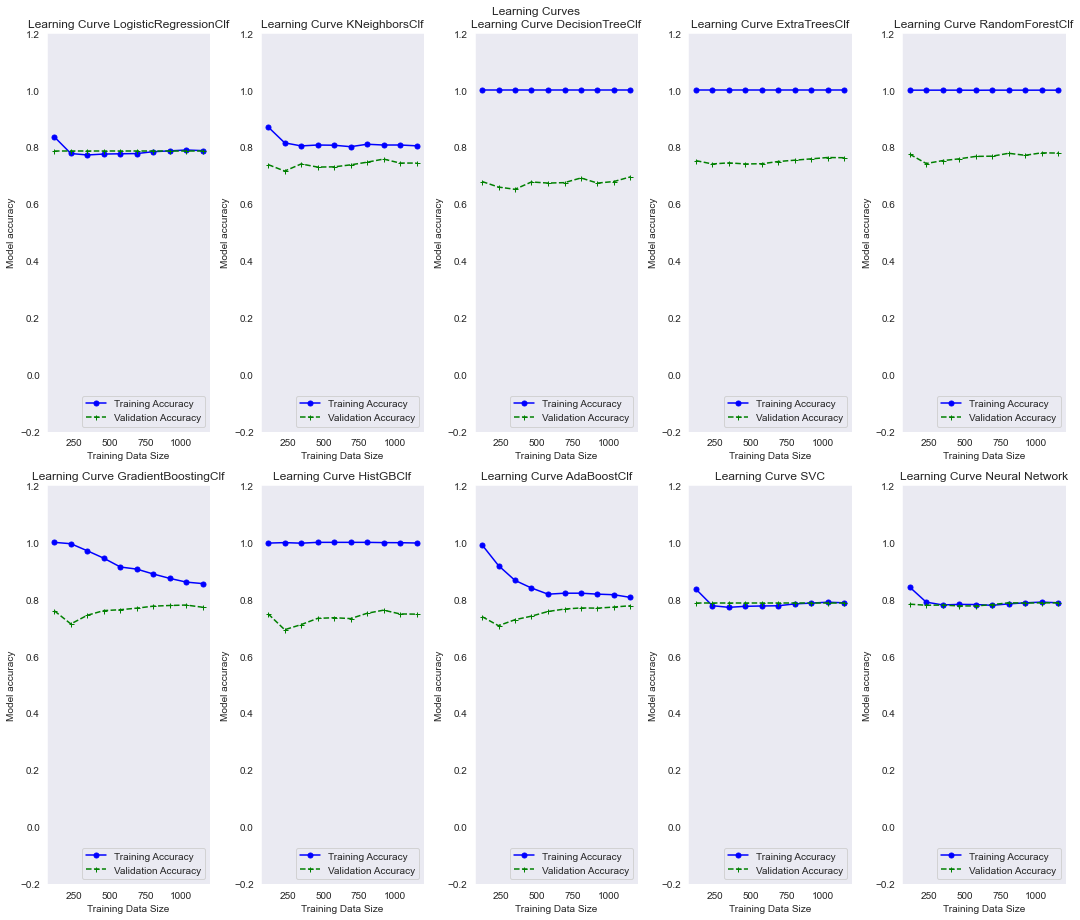

In [48]:
baseline_original_df = run_models(classification_models,pipeline_step_original,X_train_original,y_train_original,X_test_original,y_test_original)

<u><b>Things Observed</b></u>
- All the models did not experience any overfitting

- Run the different classification models

LogisticRegressionClf is running
Model Accuracy Score :0.7802907915993538


fit_time             0.107019
score_time           0.058806
test_accuracy        0.780291
train_accuracy       0.780291
test_f1_weighted     0.683997
train_f1_weighted    0.683994
test_recall          0.000000
train_recall         0.000000
test_precision       0.000000
train_precision      0.000000
test_roc_auc         0.551169
train_roc_auc        0.597640
dtype: float64

KNeighborsClf is running
Model Accuracy Score :0.7988691437802908


fit_time             0.065752
score_time           0.272997
test_accuracy        0.742355
train_accuracy       0.799318
test_f1_weighted     0.698009
train_f1_weighted    0.760826
test_recall          0.120767
train_recall         0.225900
test_precision       0.281773
train_precision      0.618393
test_roc_auc         0.507451
train_roc_auc        0.791250
dtype: float64

DecisionTreeClf is running
Model Accuracy Score :1.0


fit_time             0.115182
score_time           0.050298
test_accuracy        0.669683
train_accuracy       1.000000
test_f1_weighted     0.679305
train_f1_weighted    1.000000
test_recall          0.349074
train_recall         1.000000
test_precision       0.292947
train_precision      1.000000
test_roc_auc         0.554472
train_roc_auc        1.000000
dtype: float64

ExtraTreesClf is running
Model Accuracy Score :1.0


fit_time             0.595346
score_time           0.098336
test_accuracy        0.770601
train_accuracy       1.000000
test_f1_weighted     0.716099
train_f1_weighted    1.000000
test_recall          0.117725
train_recall         1.000000
test_precision       0.423095
train_precision      1.000000
test_roc_auc         0.600986
train_roc_auc        1.000000
dtype: float64

RandomForestClf is running
Model Accuracy Score :1.0


fit_time             1.170736
score_time           0.090515
test_accuracy        0.789182
train_accuracy       1.000000
test_f1_weighted     0.732833
train_f1_weighted    1.000000
test_recall          0.139550
train_recall         1.000000
test_precision       0.550202
train_precision      1.000000
test_roc_auc         0.636588
train_roc_auc        1.000000
dtype: float64

GradientBoostingClf is running
Model Accuracy Score :0.8731825525040388


fit_time             1.895193
score_time           0.041901
test_accuracy        0.790782
train_accuracy       0.881798
test_f1_weighted     0.741103
train_f1_weighted    0.864839
test_recall          0.165344
train_recall         0.469379
test_precision       0.595516
train_precision      0.984830
test_roc_auc         0.663917
train_roc_auc        0.965589
dtype: float64

HistGBClf is running
Model Accuracy Score :1.0


fit_time             0.931159
score_time           0.053629
test_accuracy        0.749639
train_accuracy       1.000000
test_f1_weighted     0.720656
train_f1_weighted    1.000000
test_recall          0.213228
train_recall         1.000000
test_precision       0.379522
train_precision      1.000000
test_roc_auc         0.635509
train_roc_auc        1.000000
dtype: float64

AdaBoostClf is running
Model Accuracy Score :0.8311793214862682


fit_time             0.616385
score_time           0.075163
test_accuracy        0.773833
train_accuracy       0.824986
test_f1_weighted     0.730575
train_f1_weighted    0.792897
test_recall          0.172487
train_recall         0.293294
test_precision       0.448589
train_precision      0.765998
test_roc_auc         0.623909
train_roc_auc        0.848005
dtype: float64

SVC is running
Model Accuracy Score :0.7802907915993538


fit_time             0.194938
score_time           0.091146
test_accuracy        0.780291
train_accuracy       0.780291
test_f1_weighted     0.683997
train_f1_weighted    0.683994
test_recall          0.000000
train_recall         0.000000
test_precision       0.000000
train_precision      0.000000
test_roc_auc         0.559912
train_roc_auc        0.717101
dtype: float64

Neural Network is running
Model Accuracy Score :0.7810985460420032


fit_time             1.500626
score_time           0.055205
test_accuracy        0.777859
train_accuracy       0.781098
test_f1_weighted     0.684259
train_f1_weighted    0.690601
test_recall          0.003704
train_recall         0.015519
test_precision       0.100000
train_precision      0.496389
test_roc_auc         0.568597
train_roc_auc        0.707182
dtype: float64

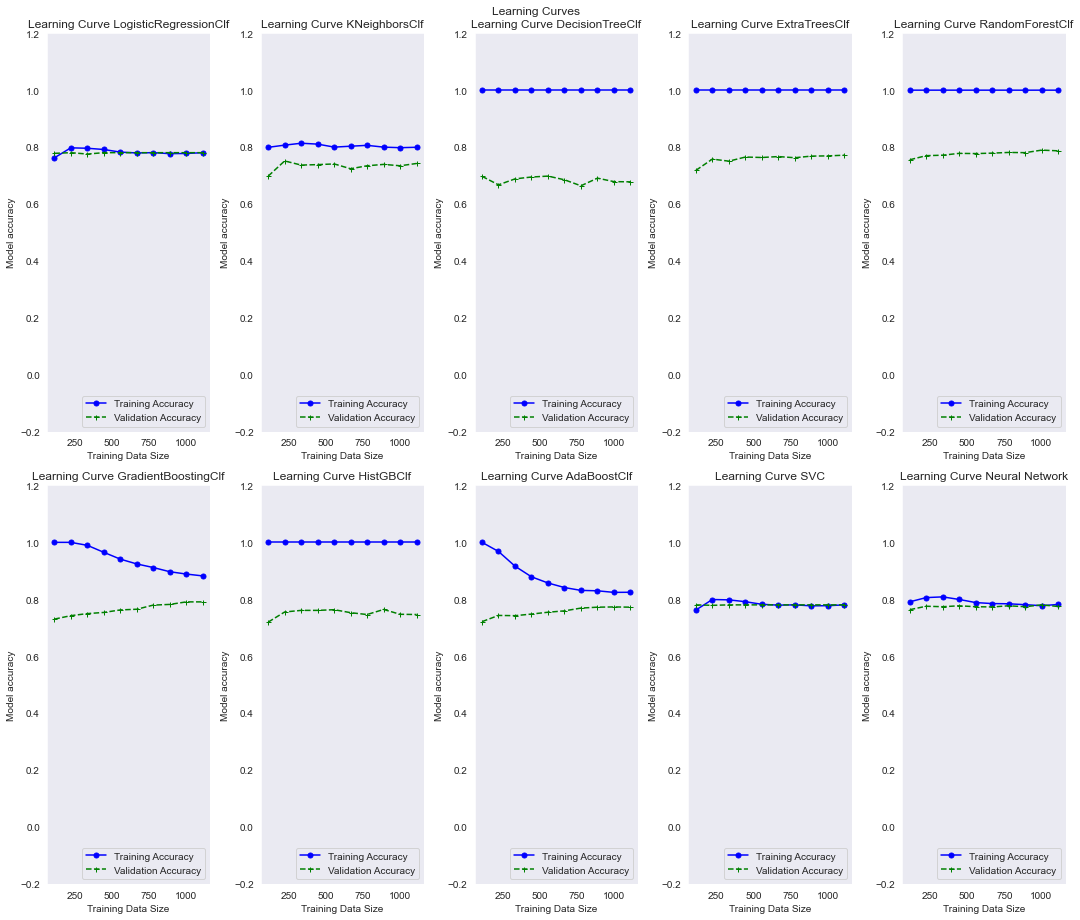

In [49]:
baselin2_df  = run_models(classification_models,pipeline_step,X_train,y_train,X_test,y_test)

<u><b>Things Observed</b></u>
- All the models did not experience any overfitting

<a class="anchor" id="9"></a>
## <font color='#63B2CB'>__Analysis of the result of each model__</font>

- Accuracy Score (Focus)
    - Accuracy score function computes the accuracy, the percentage of
correct prediction
\begin{align*}
\text{Auccracy} &= \frac{\text{TP + TN}}{\text{TP + FN + 𝑇𝑃 + 𝐹𝑁}}
\end{align*}
- Recall (Focus)   
 - Proportion of actual positives was predicted correctly
\begin{align*}
\text{Recall} &= \frac{\text{TP}}{\text{TP + FN}}
\end{align*}
- Precision
    - Proportion of positive predictions was actually correct
\begin{align*}
\text{Precision} &= \frac{\text{TP}}{\text{TP + FP}}
\end{align*}
- F1 score
    - Harmonic mean of precision and recall
- ROC 
    - ROC curve (receiver operating characteristic curve) is a graph showing the
performance of a classification model at all classification thresholds

> Note for this model I will focus on recall and accuracy score due to the need of predicting true positive and it is always better to be safe than sorry for default payment

Original data without feature engineering

In [50]:
baseline_original_df.sort_values(by='test_accuracy',ascending=False).style.bar(subset =['test_accuracy','test_f1_weighted','test_recall','test_precision','test_roc_auc'],color='green')

<u><b>Things Observed</b></u>
- In this original dataframe, we can see that `Logistic Regression` has the highest test_accuracy
- In addition we can see that the test precision and test recall all have scores of less than 0.5, showing the imbalance class in the dataset

Check with classification report for logistic regression

In [51]:
pipeline_step_original[-1] =  ("LogisticRegressionClf", LogisticRegression(solver='newton-cg'))
clf = Pipeline(steps=pipeline_step_original)

clf.fit(X_train_original,y_train_original)
print(classification_report(y_test_original,clf.predict(X_test_original)))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       252
           1       0.00      0.00      0.00        68

    accuracy                           0.79       320
   macro avg       0.39      0.50      0.44       320
weighted avg       0.62      0.79      0.69       320



<u><b>Things Observed</b></u>
- From the classification report, we can see that the f1 score accuracy is `0.69 `, precision is `0.62` and recall is `0.79`


Data after feature engineering

In [52]:
baselin2_df.sort_values(by='test_accuracy',ascending=False).style.bar(subset =['test_accuracy','test_f1_weighted','test_recall','test_precision','test_roc_auc'],color='green')

<u><b>Things Observed</b></u>
- From the above styled dataframe, we can see that `RandomForestClassifer` has the highest test accuracy at 0.793
- In addition, the test recall, test precision, all has value less than 0.5

In [53]:
pipeline_step[-1] =  ("RandomForestClf", RandomForestClassifier())
clf = Pipeline(steps=pipeline_step)

clf.fit(X_train,y_train)
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.97      0.89       242
           1       0.67      0.21      0.31        68

    accuracy                           0.80       310
   macro avg       0.74      0.59      0.60       310
weighted avg       0.78      0.80      0.76       310



<u><b>Things Observed</b></u>
- From the classification report, we can see that the f1-score has a score of  `0.8`, recall of `0.81` and precision of `0.79`

#### Compare the difference

In [54]:
# Setting the difference 
difference = pd.DataFrame(columns = [evaluation_col[0]]+evaluation_col[3:])
for i in evaluation_col[3:]:
  dif = baselin2_df[i] - baseline_original_df[i]
  difference[i] = dif
difference['model'] = baselin2_df['model']
difference

model  test_accuracy  train_accuracy  test_f1_weighted  \
0  LogisticRegressionClf      -0.007209       -0.007209         -0.009887   
1          KNeighborsClf      -0.001395       -0.005023          0.005770   
2        DecisionTreeClf      -0.020161        0.000000         -0.017515   
3          ExtraTreesClf       0.016694        0.000000          0.017058   
4        RandomForestClf       0.006369        0.000000          0.019182   
5    GradientBoostingClf       0.021250        0.026503          0.040316   
6              HistGBClf       0.001983        0.002257          0.014366   
7            AdaBoostClf      -0.004292        0.018476          0.011062   
8                    SVC      -0.007209       -0.007209         -0.009887   
9         Neural Network      -0.009641       -0.006402         -0.009626   

   train_f1_weighted  test_recall  train_recall  test_precision  \
0          -0.009888     0.000000      0.000000        0.000000   
1          -0.002384     0.047222      0.020840        0.082011   
2           0.000000    -0.004233      0.000000       -0.013123   
3           0.000000     0.044180      0.000000        0.152302   
4           0.000000     0.073148      0.000000        0.110797   
5           0.039741     0.117593      0.142171        0.293056   
6           0.002263     0.091667      0.010622        0.092209   
7           0.037396     0.076852      0.131536        0.040891   
8          -0.009888     0.000000      0.000000        0.000000   
9          -0.003280     0.003704      0.015519        0.100000   

   train_precision  test_roc_auc  train_roc_auc  
0         0.000000     -0.047793      -0.023883  
1        -0.003674     -0.010813      -0.006020  
2         0.000000     -0.012558       0.000000  
3         0.000000      0.035091       0.000000  
4         0.000000      0.006865       0.000000  
5         0.008821      0.058945       0.020174  
6         0.000000      0.044647       0.000010  
7         0.073384      0.002315       0.045858  
8         0.000000      0.024552       0.089663  
9         0.496389     -0.032546       0.038611

<u><b>Things Observed</b></u>
- Test Accuracy: About half of the model increase while the rest remain the same
- Test recall increase for majority of the model


<a class="anchor" id="10"></a>
## <font color='#63B2CB'>__Advanced model (with discretization and resample on variables)__</font>

From our observations previously, we observe that some variables can be discretize such as age, credit amount, percentage of credit (bill and pay), difference comparison

- Types of discretization
    - Pandas get dummies
    - KBins (Selected)
    

#### Additional feature selection with sklearn

- Select K best
    - chi sqaure
    - Fisher’s Score
    - Correlation Coefficient
    
This is then implemented in the pipeline below

In [55]:
best_features = Pipeline([('skb', SelectKBest(f_classif, k=25))])
best_features

Pipeline(steps=[('skb', SelectKBest(k=25))])

#### Discretization

In [56]:
def kbins(col,n_bins,strategy):
    kbins = KBinsDiscretizer(n_bins=n_bins, strategy=strategy, encode='ordinal')
    df_encode[col] = kbins.fit_transform(np.array(df_encode[col]).reshape(-1,1))
    df_encode[col] = df_encode[col].astype(int)
    return df_encode

Binning the age column first so that we are able to have one additional feature engineer

In [57]:
kbins = KBinsDiscretizer(n_bins=6, strategy='quantile', encode='ordinal')
df['Age'] = kbins.fit_transform(np.array(df['Age']).reshape(-1, 1))
df['Age'] = df['Age'].astype(int)

mean = dict(df.groupby(by='Age').mean()['Credit Limit'])
mean = dict(sorted(mean.items(), key=lambda x: x[1]))
print(mean)
df['DifferenceMeanA'] = df['Credit Limit'] -  df["Age"].apply(lambda x: mean.get(x))

{0: 72782.60869565218, 1: 150341.46341463414, 5: 167500.0, 2: 183994.0828402367, 3: 193290.59829059828, 4: 208438.66171003718}


In [58]:
class Pipeline2:
    def __init__(self):
        pass

    def pipeline_step(self):
        numeric_transformer = Pipeline([("imputer", SimpleImputer(
            strategy="median")), ('scaler', Normalizer())])

        categorical_transformer = Pipeline([("imputer", SimpleImputer(
            strategy='most_frequent')),
            ('oe', OrdinalEncoder())])

        categorical_transformer2 = Pipeline([("imputer", SimpleImputer(
            strategy='most_frequent')),
            ('ce', CustomEncoder())])

        categorical_transformer3 = Pipeline([("imputer", SimpleImputer(
            strategy='most_frequent')),
            ('ohe', OneHotEncoder())])

        preprocessing_step = ColumnTransformer(
            [
                ("numeric", numeric_transformer, ['Bill_Amount1', 'Bill_Amount2', 'Bill_Amount3', 'Pay_Amount1',
                                                  'Pay_Amount2', 'Pay_Amount3']),
                ('oe', categorical_transformer,
                 ['Marriage Status', 'Gender']),
                ('custom_e', categorical_transformer2, ['Education']),
                ('ohe', categorical_transformer3, ['MarriageGender']),
                ('Kbins', self.bins_transformer(10), [
                    'Credit Limit', 'DifferenceMeanMG', 'DifferenceMeanG', 'DifferenceMeanE','DifferenceMeanA']),
                ('KBins2', self.bins_transformer(8), ['per_of_pay_df_limit1', 'per_of_pay_df_limit2', 'per_of_pay_df_limit3',
                                                      'per_of_bill_df_limit1', 'per_of_bill_df_limit2', 'per_of_bill_df_limit3'])
            ],
            remainder="passthrough",
        )
        process = [('preprocessing', preprocessing_step),('select',best_features)]
        return process


    def bins_transformer(self, n):
        bins_transformer = Pipeline([('KBinsDiscretizer', KBinsDiscretizer(
            n_bins=n, strategy='quantile', encode='ordinal'))])
        return bins_transformer


p2 = Pipeline2()


Initiliase pipeline 2 with additional feature engineering

In [59]:
pipeline2_step = p2.pipeline_step()
pipeline2_step

[('preprocessing',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('numeric',
                                   Pipeline(steps=[('imputer',
                                                    SimpleImputer(strategy='median')),
                                                   ('scaler', Normalizer())]),
                                   ['Bill_Amount1', 'Bill_Amount2',
                                    'Bill_Amount3', 'Pay_Amount1', 'Pay_Amount2',
                                    'Pay_Amount3']),
                                  ('oe',
                                   Pipeline(steps=[('imputer',
                                                    SimpleImputer(strategy='most_frequent')),
                                                   ('oe', OrdinalEncoder())]),
                                   ['Marr...
                                                    KBinsDiscretizer(encode='ordinal',
                                                 

#### Oversmapling imbalance target variable

- From the dataset, we observed that there is an imblanace of class, hence we need to resample the data in order to have a balance dataset
- Types of oversampling method
    - SMOTE
        - SMOTE stands for Synthetic Minority Oversampling Technique. It works by utilizing a k-nearest neighbor algorithm to create synthetic data.
    - ADASYN 
        - The synthetic data generation is inversely proportional to the density of the minority class. A comparatively larger number of synthetic data is created in regions of a low density of minority class than higher density regions.
    - KmeansSMOTE
        - K-Means SMOTE aids classification by generating minority class samples in safe and crucial areas of the input space. The method avoids the generation of noise and effectively overcomes imbalances between and within classes.
    - SMOTEN
        - Synthetic Minority Over-sampling Technique for Nominal (Selected)
    - Oversampler
        - Random Over Sampling balances the data by replicating the minority class samples. This does not cause any loss of information, but the dataset is prone to overfitting as the same information is copied.

- Make a second train test split

In [60]:
X = df.drop('Default payment next month',axis=1)
y = df['Default payment next month']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15, stratify=y, shuffle=True,random_state = 32)

In [62]:
a = SMOTEN(random_state=32)

X_train, y_train = a.fit_resample(X_train,y_train)
print(f'Original dataset have shape of {len(X_train),len(y_train)}')
print(f'Resampled dataset have shape of {len(X_train),len(y_train)}')

Original dataset have shape of (2052, 2052)
Resampled dataset have shape of (2052, 2052)


Analysis on resampled data

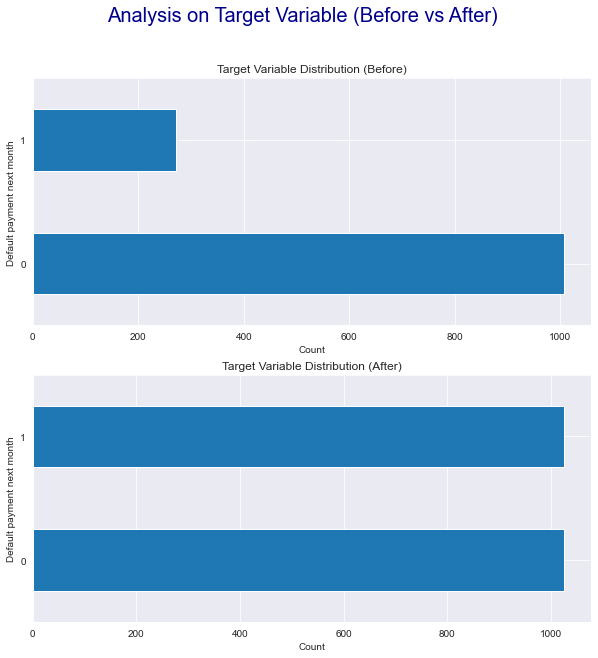

In [63]:
fig,ax = plt.subplots(2,1,figsize=(10,10))
fig.suptitle("Analysis on Target Variable (Before vs After)",size=20,color='darkblue')
y_train_original.value_counts().plot(kind="barh",
                             title="Target Variable Distribution (Before)",
                             ylabel="Default payment next month",
                             xlabel="Count",
                             ax=ax[0])
y_train.value_counts().plot(kind="barh",
                             title="Target Variable Distribution (After)",
                             ylabel="Default payment next month",
                             xlabel="Count",
                             ax=ax[1])
plt.show()

#### Preparing the pipeline

In [64]:
pipeline2_step.append(0)

LogisticRegressionClf is running
Model Accuracy Score :0.8494152046783626


fit_time             0.609576
score_time           0.067131
test_accuracy        0.840919
train_accuracy       0.851260
test_f1_weighted     0.823573
train_f1_weighted    0.850430
test_recall          0.769294
train_recall         0.779298
test_precision       0.869321
train_precision      0.909977
test_roc_auc         0.894057
train_roc_auc        0.900549
dtype: float64

KNeighborsClf is running
Model Accuracy Score :0.8669590643274854


fit_time             0.099135
score_time           0.146508
test_accuracy        0.801842
train_accuracy       0.863604
test_f1_weighted     0.796367
train_f1_weighted    0.863578
test_recall          0.810099
train_recall         0.851636
test_precision       0.783559
train_precision      0.872434
test_roc_auc         0.867531
train_roc_auc        0.943761
dtype: float64

DecisionTreeClf is running
Model Accuracy Score :1.0


fit_time             0.123318
score_time           0.065044
test_accuracy        0.799429
train_accuracy       1.000000
test_f1_weighted     0.791225
train_f1_weighted    1.000000
test_recall          0.809147
train_recall         1.000000
test_precision       0.775500
train_precision      1.000000
test_roc_auc         0.799277
train_roc_auc        1.000000
dtype: float64

ExtraTreesClf is running
Model Accuracy Score :1.0


fit_time             0.711807
score_time           0.107368
test_accuracy        0.861399
train_accuracy       1.000000
test_f1_weighted     0.839994
train_f1_weighted    1.000000
test_recall          0.763402
train_recall         1.000000
test_precision       0.935267
train_precision      1.000000
test_roc_auc         0.897804
train_roc_auc        1.000000
dtype: float64

RandomForestClf is running
Model Accuracy Score :1.0


fit_time             0.979431
score_time           0.104210
test_accuracy        0.860438
train_accuracy       1.000000
test_f1_weighted     0.834688
train_f1_weighted    1.000000
test_recall          0.750742
train_recall         1.000000
test_precision       0.944134
train_precision      1.000000
test_roc_auc         0.902115
train_roc_auc        1.000000
dtype: float64

GradientBoostingClf is running
Model Accuracy Score :0.9025341130604289


fit_time             1.529836
score_time           0.067963
test_accuracy        0.858942
train_accuracy       0.907464
test_f1_weighted     0.840399
train_f1_weighted    0.906913
test_recall          0.772159
train_recall         0.832360
test_precision       0.920262
train_precision      0.979363
test_roc_auc         0.898314
train_roc_auc        0.978537
dtype: float64

HistGBClf is running
Model Accuracy Score :1.0


fit_time             0.904179
score_time           0.076178
test_accuracy        0.847710
train_accuracy       1.000000
test_f1_weighted     0.832894
train_f1_weighted    1.000000
test_recall          0.783819
train_recall         1.000000
test_precision       0.884207
train_precision      1.000000
test_roc_auc         0.903690
train_roc_auc        1.000000
dtype: float64

AdaBoostClf is running
Model Accuracy Score :0.8596491228070176


fit_time             0.551564
score_time           0.101958
test_accuracy        0.840412
train_accuracy       0.867071
test_f1_weighted     0.828785
train_f1_weighted    0.866763
test_recall          0.794584
train_recall         0.819798
test_precision       0.850607
train_precision      0.905264
test_roc_auc         0.899066
train_roc_auc        0.932163
dtype: float64

SVC is running
Model Accuracy Score :0.665692007797271


fit_time             0.548516
score_time           0.193714
test_accuracy        0.667312
train_accuracy       0.669592
test_f1_weighted     0.659701
train_f1_weighted    0.668357
test_recall          0.612241
train_recall         0.613486
test_precision       0.664189
train_precision      0.690788
test_roc_auc         0.694519
train_roc_auc        0.695239
dtype: float64

Neural Network is running
Model Accuracy Score :0.7339181286549707


fit_time             0.555790
score_time           0.064041
test_accuracy        0.663829
train_accuracy       0.677994
test_f1_weighted     0.636974
train_f1_weighted    0.655715
test_recall          0.565382
train_recall         0.592402
test_precision       0.707468
train_precision      0.724460
test_roc_auc         0.691791
train_roc_auc        0.712454
dtype: float64

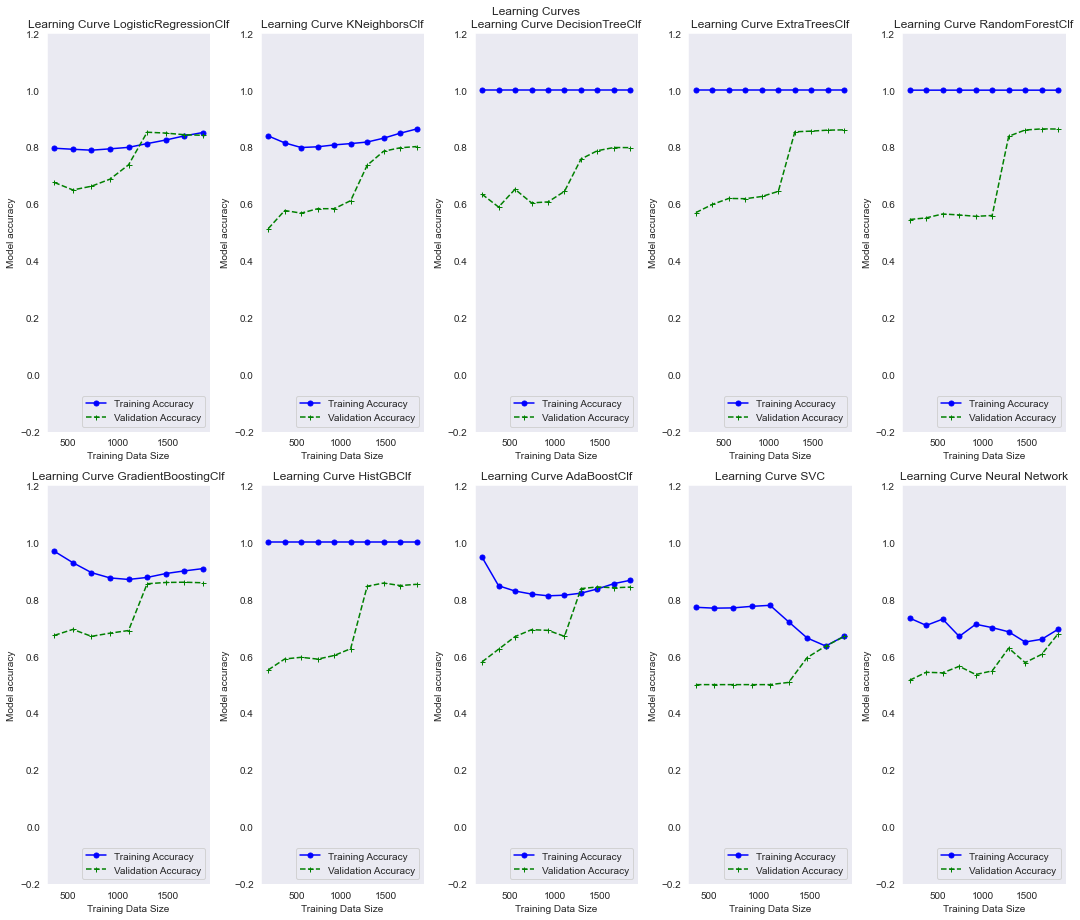

In [65]:
additional_df= run_models(classification_models,pipeline2_step,X_train,y_train,X_test,y_test)

Checking the average score of the different model

In [66]:
additional_df.sort_values(by='test_accuracy',ascending=False).style.bar(subset =['test_accuracy','test_f1_weighted','test_recall','test_precision','test_roc_auc'],color='green')

<u><b> Things Observed </b></u>
- From the result above, we see that almost all model cross the 80% test accuracy showing that the advanced model is a success comapred to baseline model
with the highest being extra tree classifier

Top 3
- Extra Tree
- Random Forest Classifier
- Gradient Boosting Classifier

Compare the difference with baseline 2

In [67]:
# Setting the difference 
difference2 = pd.DataFrame(columns = [evaluation_col[0]]+evaluation_col[3:])
for i in evaluation_col[3:]:
  dif = additional_df[i] - baselin2_df[i]
  difference2[i] = dif
difference2['model'] = baselin2_df['model']
difference2

model  test_accuracy  train_accuracy  test_f1_weighted  \
0  LogisticRegressionClf       0.060628        0.070969          0.139576   
1          KNeighborsClf       0.059487        0.064286          0.098358   
2        DecisionTreeClf       0.129747        0.000000          0.111919   
3          ExtraTreesClf       0.090799        0.000000          0.123895   
4        RandomForestClf       0.071256        0.000000          0.101855   
5    GradientBoostingClf       0.068160        0.025666          0.099297   
6              HistGBClf       0.098071        0.000000          0.112238   
7            AdaBoostClf       0.066579        0.042084          0.098210   
8                    SVC      -0.112979       -0.110699         -0.024297   
9         Neural Network      -0.114030       -0.103104         -0.047285   

   train_f1_weighted  test_recall  train_recall  test_precision  \
0           0.166437     0.769294      0.779298        0.869321   
1           0.102752     0.689332      0.625736        0.501786   
2           0.000000     0.460073      0.000000        0.482553   
3           0.000000     0.645677      0.000000        0.512172   
4           0.000000     0.611192      0.000000        0.393932   
5           0.042074     0.606815      0.362981        0.324746   
6           0.000000     0.570591      0.000000        0.504685   
7           0.073866     0.622097      0.526505        0.402017   
8          -0.015637     0.612241      0.613486        0.664189   
9          -0.034886     0.561678      0.576883        0.607468   

   train_precision  test_roc_auc  train_roc_auc  
0         0.909977      0.342888       0.302909  
1         0.254041      0.360080       0.152512  
2         0.000000      0.244805       0.000000  
3         0.000000      0.296818       0.000000  
4         0.000000      0.265528       0.000000  
5        -0.005466      0.234397       0.012948  
6         0.000000      0.268181       0.000000  
7         0.139265      0.275158       0.084158  
8         0.690788      0.134608      -0.021862  
9         0.228071      0.123194       0.005272

#### Run the graph for comparison between before advanced method and after

In [68]:
def model_graph(models):
    for model_name,model in models.items():
        fig, ax = plt.subplots(2, 1, figsize=(8, 9))
        pipeline_step_original[-1] = (model_name,model)

        clf = Pipeline(steps=pipeline_step_original)
        
        pipeline2_step[-1] = (model_name,model)
        clf2 = Pipeline(steps=pipeline2_step)
        modelFunc.plot_learning_curve(model_name,clf,X_train_original,y_train_original,ax[0])
        modelFunc.plot_learning_curve(model_name,clf2,X_train,y_train,ax[1])
        plt.show()
# model_graph(classification_models)

def compare(models,pipelines,model_name):
    # Plot comparison model
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    index = 0
    for model,pipe in zip(models,pipelines):
        roc_display1 = RocCurveDisplay.from_estimator(pipe, X_test, y_test, ax=ax[0], name=f"{model_name[0]} (Additional)")
        x = np.linspace(0, 1, 2)
        ax[index].plot(x, x, ":", color="red")
        ax[index].set_title(f"ROC Curve {model_name[i]}")

    plt.show()
def confusion(y_pred,y_test,name,word):
    # Plot confusion matrix
    fig, ax = plt.subplots(figsize=(7, 7))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d",cmap="YlGnBu", ax=ax)
    fig.suptitle(f'{name} Clasifier {word}',size=20)
    fig.set_facecolor('lightgray')
    ax.set_ylabel("Actual Valuse")
    ax.set_xlabel("Predicted Values")
    ax.set_xticklabels(["0", "1"])
    ax.set_yticklabels(["0", "1"])
    plt.show()

#### Classification report of the top 3 models

Random Forest Classifier

In [69]:
pipeline2_step[-1] = ('clf',RandomForestClassifier())
pipeline1 = Pipeline(steps=pipeline2_step)
pipeline1.fit(X_train, y_train)
y_pred = pipeline1.predict(X_test)
print(classification_report(y_test, pipeline1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.98      0.87       182
           1       0.50      0.08      0.14        51

    accuracy                           0.78       233
   macro avg       0.65      0.53      0.51       233
weighted avg       0.73      0.78      0.71       233



- confusion matrix

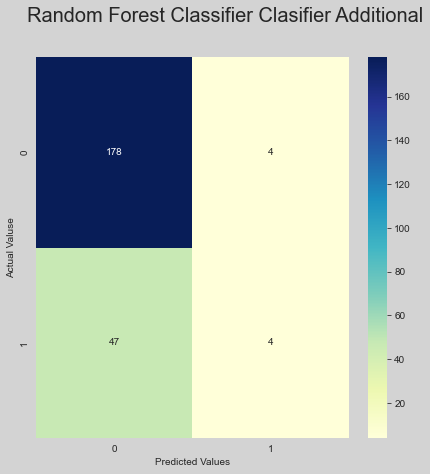

In [70]:
confusion(y_pred,y_test,'Random Forest Classifier','Additional')

Extra Tree classifier

<u><b> Things Observed </b></u>
- For Gradient Boosting Classifier, we can see that the test accuracy increase compared to before tuning from `85.4` to `86.0`
- The classification report did for precision decrease to 0.71

In [71]:
pipeline2_step[-1] = ('clf',ExtraTreesClassifier())
pipeline2 = Pipeline(steps=pipeline2_step)
pipeline2.fit(X_train, y_train)
y_pred = pipeline2.predict(X_test)
print(classification_report(y_test, pipeline2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87       182
           1       0.42      0.10      0.16        51

    accuracy                           0.77       233
   macro avg       0.60      0.53      0.51       233
weighted avg       0.71      0.77      0.71       233



- confusion matrix

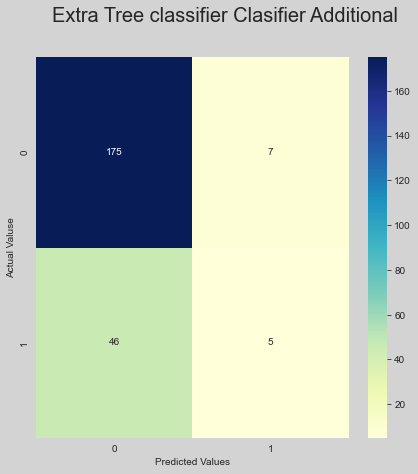

In [72]:
confusion(y_pred,y_test,'Extra Tree classifier','Additional')

Gradient Boosting Classifier

In [73]:
pipeline2_step[-1] = ('clf',GradientBoostingClassifier())
pipeline3 = Pipeline(steps=pipeline2_step)
pipeline3.fit(X_train, y_train)
y_pred = pipeline3.predict(X_test)
print(classification_report(y_test, pipeline3.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       182
           1       0.47      0.16      0.24        51

    accuracy                           0.78       233
   macro avg       0.64      0.55      0.55       233
weighted avg       0.73      0.78      0.73       233



- confusion matrix

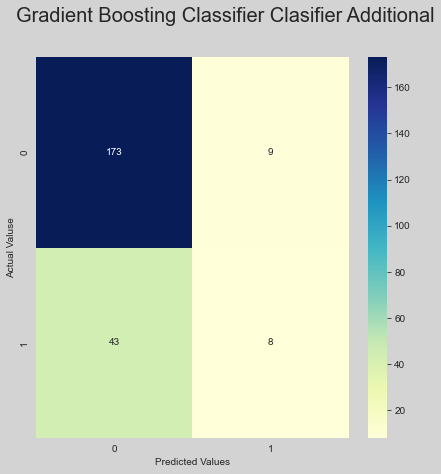

In [74]:
confusion(y_pred,y_test,'Gradient Boosting Classifier','Additional')

<u><b>Things Observed</b></u>
- The top 3 scores in terms of test acucracy was choosen after accessing the dataframe
- Then, from the top 3 model, we can see that in classification model, Gradient Boosting performed the best at 0.8 for recall
- Models improved slightly after resampling


<a class="anchor" id="11"></a>
## <font color='#63B2CB'>__Hyperparameter Tuning__

Randomised cv was used over grid search due to the faster time and ability to run more folds in a shorter period of time

Answeing to ` Did you try to tune the hyperparameters of the learning algorithm, and in 
that case how?`

From the above model, logisitc regression, gradient boosting classier and random forest classifer was choosen to further tune

#### Tuning

Setting up the class for tuning

In [75]:
class Tuning:
    def __init__(self):
        pass

    def tune(self, param, model):
        # Tune the model here with added step
        pipeline2_step[-1] = ("tuning", RandomizedSearchCV(model, param, cv=StratifiedKFold(n_splits=10), n_jobs=-1, scoring="recall_weighted", n_iter=15
                                                           ),
                              )

        tuned = Pipeline(steps=pipeline2_step)
        tuned.fit(X_train, y_train)
        print(tuned.named_steps["tuning"].best_params_)
        return tuned


tune = Tuning()


#### Setting up the param grid for the three models

##### Extra Tree Classifier

In [76]:
param_grid_etc = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
        'bootstrap': [True, False],                   
    'criterion': ['gini', 'entropy'],              
}
etc_tuned_result = tune.tune(param_grid_etc,ExtraTreesClassifier())
(pd.DataFrame(etc_tuned_result['tuning'].cv_results_))

{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': None, 'criterion': 'gini', 'bootstrap': True}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        1.111472      0.087051         0.062746        0.006884   
1        0.938347      0.040377         0.078465        0.031616   
2        1.070593      0.069904         0.059520        0.002114   
3        1.517508      0.081676         0.084903        0.007788   
4        1.333081      0.057338         0.085016        0.009758   
5        1.143206      0.058571         0.062245        0.004527   
6        0.984055      0.033417         0.057300        0.007698   
7        1.068732      0.037097         0.062804        0.005887   
8        0.481906      0.019305         0.032913        0.004018   
9        1.194653      0.041660         0.060565        0.006052   
10       0.553516      0.020375         0.032356        0.004936   
11       0.478626      0.018312         0.029791        0.003313   
12       0.575429      0.031106         0.032323        0.002878   
13       1.302847      0.069482         0.057065        0.003418   
14       1.111484      0.173923         0.051318        0.006030   

   param_n_estimators param_min_samples_split param_min_samples_leaf  \
0                 200                       5                      4   
1                 200                       5                      2   
2                 200                       5                      4   
3                 300                       5                      1   
4                 300                      10                      1   
5                 200                      10                      4   
6                 200                      10                      2   
7                 200                      10                      4   
8                 100                       2                      2   
9                 200                      10                      4   
10                100                       5                      4   
11                100                       5                      1   
12                100                       5                      2   
13                200                       5                      2   
14                300                       2                      4   

   param_max_features param_max_depth param_criterion  ... split3_test_score  \
0                log2            None            gini  ...          0.985366   
1                auto               5         entropy  ...          0.931707   
2                log2              10            gini  ...          0.990244   
3                auto               5         entropy  ...          0.936585   
4                auto               5         entropy  ...          0.931707   
5                auto              10            gini  ...          0.990244   
6                auto               5            gini  ...          0.931707   
7                log2              10         entropy  ...          0.985366   
8                sqrt               5            gini  ...          0.921951   
9                auto            None            gini  ...          0.990244   
10               log2              10         entropy  ...          0.975610   
11               sqrt               5            gini  ...          0.921951   
12               log2              10            gini  ...          0.985366   
13               sqrt            None         entropy  ...          0.985366   
14               sqrt               5            gini  ...          0.931707   

   split4_test_score  split5_test_score  split6_test_score  split7_test_score  \
0           0.995122           0.985366           0.990244           0.990244   
1           0.970732           0.956098           0.956098           0.975610   
2           0.995122           0.980488           0.985366           0.990244   
3           0.975610           0.946341           0.956098           0.975610   
4           0.985366           0.960976           0.956098           0.97561

Run the test result here

In [77]:
pipeline2_step[-1] = ("clf", etc_tuned_result.named_steps["tuning"].best_estimator_)
etc_tuned = Pipeline(steps=pipeline2_step)
etc_tuned.fit(X_train, y_train)
etc_tuned_y_pred = etc_tuned.predict(X_test)
scores = pd.DataFrame(cross_validate(etc_tuned,X_train,y_train,cv=StratifiedKFold(n_splits=10),scoring=evaluation))

Results mean

In [78]:
scores.mean()

fit_time            0.723175
score_time          0.122964
test_accuracy       0.869221
test_f1_weighted    0.842916
test_recall         0.751742
test_precision      0.962392
test_roc_auc        0.900599
dtype: float64

Classsification report

In [79]:
print(classification_report(y_test,etc_tuned_y_pred))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87       182
           1       0.40      0.08      0.13        51

    accuracy                           0.77       233
   macro avg       0.59      0.52      0.50       233
weighted avg       0.70      0.77      0.71       233



Confusion matrix

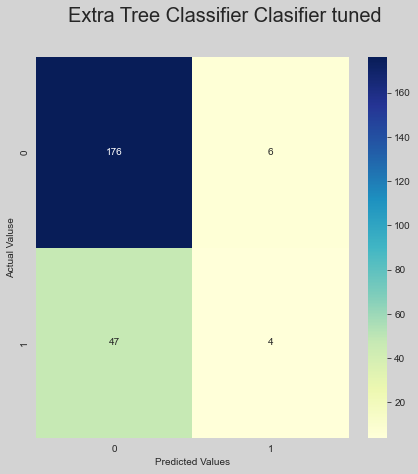

In [80]:
confusion(etc_tuned_y_pred,y_test,'Extra Tree Classifier','tuned')

learning curve

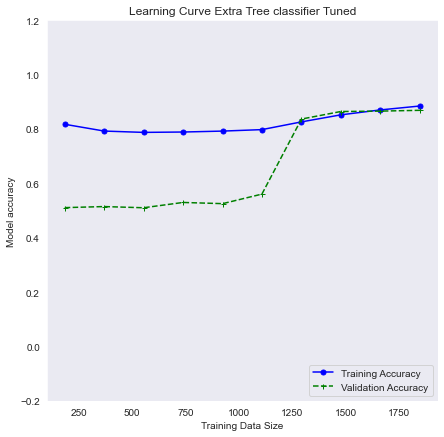

In [81]:
fig,ax = plt.subplots(1,1,figsize=(7,7))
modelFunc.plot_learning_curve('Extra Tree classifier Tuned',etc_tuned,X_train,y_train,ax)

Comparing with dummy model

In [82]:
difference_dummy1 = scores.mean() - dummy_scores.mean() 
difference_dummy1.dropna()

fit_time            0.675795
score_time          0.076305
test_accuracy       0.081721
test_f1_weighted    0.149031
test_precision      0.962392
test_recall         0.751742
test_roc_auc        0.400599
dtype: float64

<u><b> Things Observed </b></u>
- For Gradient Boosting Classifier, we can see that the test accuracy increase compared to before tuning 
- The classification report did for recall increase from 0.77 to 0.78 and precision increase too

##### Gradient Boosting Classifer

In [83]:
param_grid_gbc = {
    "max_depth":[1,3,100,200,300],
    "learning_rate":[0.01,0.1,0.15,0.18],
}
gbc_tuned_result = tune.tune(param_grid_gbc,GradientBoostingClassifier())
(pd.DataFrame(gbc_tuned_result['tuning'].cv_results_))

{'max_depth': 3, 'learning_rate': 0.1}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        1.800887      0.184139         0.006664        0.003358   
1        1.831635      0.185238         0.001814        0.002897   
2        6.146719      0.582596         0.005599        0.005038   
3        1.750233      0.095853         0.005042        0.003862   
4        6.110227      0.282680         0.007203        0.002401   
5        5.824718      0.410952         0.006841        0.004494   
6        5.713427      0.307359         0.006476        0.002802   
7        5.553752      0.273520         0.006388        0.003408   
8        5.870947      0.231514         0.007134        0.002903   
9        1.686084      0.068912         0.007532        0.006970   
10       5.939112      0.382160         0.006850        0.002540   
11       5.490396      0.283760         0.006247        0.003341   
12       0.650030      0.012572         0.001651        0.002758   
13       5.610704      0.219998         0.005446        0.002282   
14       0.639078      0.015581         0.006137        0.003628   

   param_max_depth param_learning_rate  \
0                3                0.01   
1                3                 0.1   
2              300                0.15   
3                3                0.15   
4              200                 0.1   
5              100                0.18   
6              100                 0.1   
7              300                0.18   
8              200                0.01   
9                3                0.18   
10             200                0.15   
11             200                0.18   
12               1                0.15   
13             100                0.01   
14               1                0.18   

                                       params  split0_test_score  \
0     {'max_depth': 3, 'learning_rate': 0.01}           0.572816   
1      {'max_depth': 3, 'learning_rate': 0.1}           0.582524   
2   {'max_depth': 300, 'learning_rate': 0.15}           0.616505   
3     {'max_depth': 3, 'learning_rate': 0.15}           0.567961   
4    {'max_depth': 200, 'learning_rate': 0.1}           0.611650   
5   {'max_depth': 100, 'learning_rate': 0.18}           0.621359   
6    {'max_depth': 100, 'learning_rate': 0.1}           0.616505   
7   {'max_depth': 300, 'learning_rate': 0.18}           0.606796   
8   {'max_depth': 200, 'learning_rate': 0.01}           0.616505   
9     {'max_depth': 3, 'learning_rate': 0.18}           0.587379   
10  {'max_depth': 200, 'learning_rate': 0.15}           0.616505   
11  {'max_depth': 200, 'learning_rate': 0.18}           0.611650   
12    {'max_depth': 1, 'learning_rate': 0.15}           0.567961   
13  {'max_depth': 100, 'learning_rate': 0.01}           0.611650   
14    {'max_depth': 1, 'learning_rate': 0.18}           0.563107   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.553398           0.629268           0.951220   
1            0.558252           0.653659           0.970732   
2            0.553398           0.653659           0.873171   
3            0.543689           0.663415           0.946341   
4            0.558252           0.663415           0.873171   
5            0.553398           0.663415           0.868293   
6            0.558252           0.658537           0.882927   
7            0.553398           0.653659           0.868293   
8            0.543689           0.663415           0.878049   
9            0.563107           0.668293           0.956098   
10           0.543689           0.658537           0.863415   
11           0.553398           0.658537           0.887805   
12           0.524272           0.639024           0.965854   
13           0.548544           0.658537           0.863415   
14           0.533981           0.639024           0.965854   

    split4_test_score  split5_test_score  split6_test_score  \
0            0.980488           0.956098           0.970732   
1            0.980

In [84]:
pipeline2_step[-1] = ("clf", gbc_tuned_result.named_steps["tuning"].best_estimator_)
gbc_tuned = Pipeline(steps=pipeline2_step)
gbc_tuned.fit(X_train, y_train)
gbc_tuned_y_pred = gbc_tuned.predict(X_test)
scores = pd.DataFrame(cross_validate(gbc_tuned,X_train,y_train,cv=StratifiedKFold(n_splits=10),scoring=evaluation))

In [85]:
scores.mean()

fit_time            1.233292
score_time          0.053256
test_accuracy       0.858942
test_f1_weighted    0.840399
test_recall         0.772159
test_precision      0.920262
test_roc_auc        0.898852
dtype: float64

In [86]:
print(classification_report(y_test, gbc_tuned_y_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       182
           1       0.47      0.16      0.24        51

    accuracy                           0.78       233
   macro avg       0.64      0.55      0.55       233
weighted avg       0.73      0.78      0.73       233



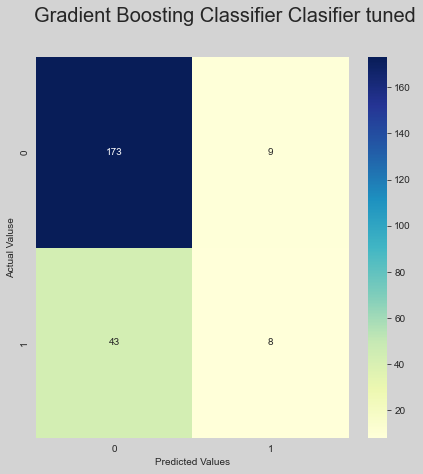

In [87]:
confusion(gbc_tuned_y_pred,y_test,'Gradient Boosting Classifier','tuned')

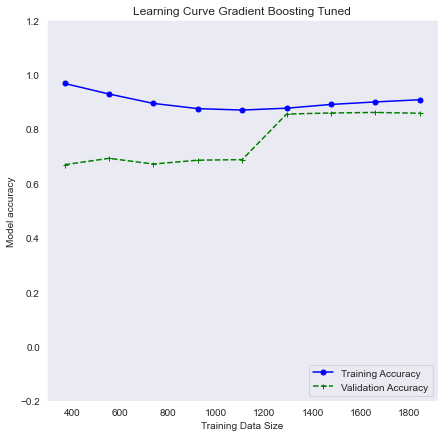

In [88]:
fig,ax = plt.subplots(1,1,figsize=(7,7))
modelFunc.plot_learning_curve('Gradient Boosting Tuned',gbc_tuned,X_train,y_train,ax)

Comparing with dummy model

In [89]:
difference_dummy1 = scores.mean() - dummy_scores.mean() 
difference_dummy1.dropna()

fit_time            1.185913
score_time          0.006597
test_accuracy       0.071442
test_f1_weighted    0.146515
test_precision      0.920262
test_recall         0.772159
test_roc_auc        0.398852
dtype: float64

<u><b> Things Observed </b></u>
- For Gradient Boosting Classifier, we can see that the test accuracy slight decrease compared to before tuning
- The classification report did experience a slight decrease

##### Random Forest Classifier

In [90]:
param_grid_rfc = {
    'max_depth': [10,20,100, 300,400, 500],             
    'max_features': ['sqrt'],                 
    'min_samples_leaf': [1, 2],               
    'min_samples_split': [1, 3, 5],       
    'n_estimators': [25, 50, 100, 300, 500],
     'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
      'criterion': ['gini', 'entropy']
     
}
rfc_tuned_result = tune.tune(param_grid_rfc,RandomForestClassifier())
(pd.DataFrame(rfc_tuned_result['tuning'].cv_results_))

{'n_estimators': 500, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini'}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.001960      0.004902         0.000000        0.000000   
1        1.956680      0.167572         0.089825        0.017961   
2        0.312337      0.025420         0.016530        0.003534   
3        0.613362      0.054189         0.030324        0.005477   
4        1.628293      0.080226         0.077388        0.005563   
5        0.134865      0.008286         0.012993        0.003217   
6        1.676515      0.073373         0.075776        0.005121   
7        0.001165      0.001332         0.000000        0.000000   
8        0.002506      0.003509         0.000000        0.000000   
9        1.654058      0.057640         0.077194        0.005586   
10       3.826754      0.329904         0.094371        0.009400   
11       0.000000      0.000000         0.000000        0.000000   
12       0.001600      0.003201         0.000000        0.000000   
13       0.542317      0.022341         0.028947        0.003317   
14       0.295952      0.030076         0.012813        0.004050   

   param_n_estimators param_min_weight_fraction_leaf param_min_samples_split  \
0                  50                            0.2                       1   
1                 300                            0.1                       3   
2                  50                            0.1                       5   
3                 100                            0.2                       5   
4                 300                            0.2                       5   
5                  25                            0.2                       5   
6                 300                            0.2                       3   
7                 300                            0.0                       1   
8                  25                            0.0                       1   
9                 300                            0.2                       5   
10                500                            0.0                       5   
11                100                            0.2                       1   
12                500                            0.1                       1   
13                100                            0.2                       5   
14                 50                            0.1                       5   

   param_min_samples_leaf param_max_features param_max_depth  ...  \
0                       2               sqrt              20  ...   
1                       1               sqrt             100  ...   
2                       1               sqrt              10  ...   
3                       1               sqrt              20  ...   
4                       2               sqrt              20  ...   
5                       1               sqrt             400  ...   
6                       1               sqrt             300  ...   
7                       1               sqrt             500  ...   
8                       2               sqrt              10  ...   
9                       2               sqrt             500  ...   
10                      2               sqrt              10  ...   
11                      2               sqrt             100  ...   
12                      1               sqrt             100  ...   
13                      2               sqrt             400  ...   
14                      1               sqrt             500  ...   

   split3_test_score split4_test_score  split5_test_score  split6_test_score  \
0                NaN               NaN                NaN                NaN   
1           0.941463          0.975610           0.936585           0.931707   
2           0.926829          0.965854           0.946341           0.946341   
3           0.931707          0.960976           0.902439           0.941463   
4           0.917073          0.941463           0.912195           0.946341   
5           0.912195          0.941463           

Run the tunning here 

In [91]:
pipeline2_step[-1] = ("clf", rfc_tuned_result.named_steps["tuning"].best_estimator_)
rfc_tuned = Pipeline(steps=pipeline2_step)
rfc_tuned.fit(X_train, y_train)
rfc_tuned_y_pred = rfc_tuned.predict(X_test)
scores = pd.DataFrame(cross_validate(rfc_tuned,X_train,y_train,cv=StratifiedKFold(n_splits=10),scoring=evaluation))

Results mean

In [92]:
scores.mean()

fit_time            3.057016
score_time          0.212212
test_accuracy       0.863355
test_f1_weighted    0.838008
test_recall         0.753665
test_precision      0.957837
test_roc_auc        0.904104
dtype: float64

Classification report

In [93]:
print(classification_report(y_test, rfc_tuned_y_pred))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       182
           1       0.67      0.08      0.14        51

    accuracy                           0.79       233
   macro avg       0.73      0.53      0.51       233
weighted avg       0.77      0.79      0.72       233



Confusion matrix

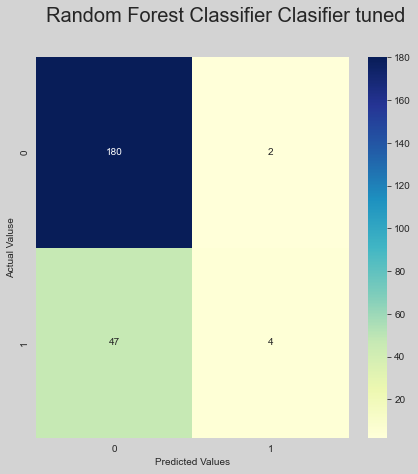

In [94]:
confusion(rfc_tuned_y_pred,y_test,'Random Forest Classifier','tuned')

Learning curve

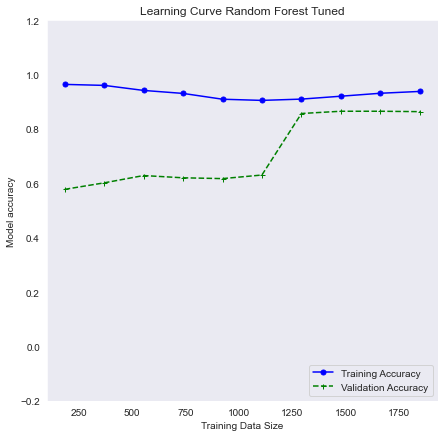

In [95]:
fig,ax = plt.subplots(1,1,figsize=(7,7))
modelFunc.plot_learning_curve('Random Forest Tuned',rfc_tuned,X_train,y_train,ax)

Comparing with dummy model

In [96]:
difference_dummy1 = scores.mean() - dummy_scores.mean() 
difference_dummy1.dropna()

fit_time            3.009637
score_time          0.165553
test_accuracy       0.075855
test_f1_weighted    0.144123
test_precision      0.957837
test_recall         0.753665
test_roc_auc        0.404104
dtype: float64

<u><b> Things Observed </b></u>
- For Random Forest Classifier, we can see that the test accuracy increase compared to before tuning 
- The classification report did remain the same however as we look at recall at 0.79 but precision improved

#### AUC Curve

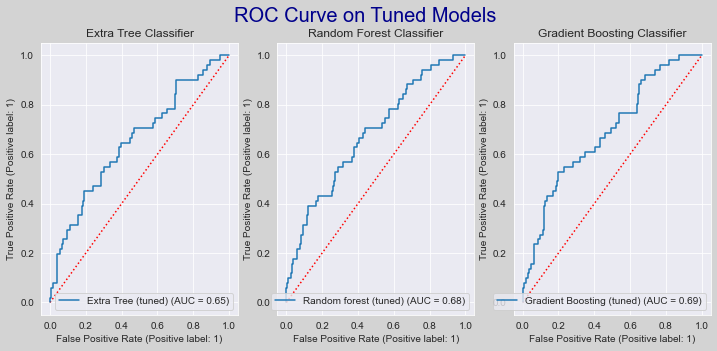

In [97]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5))
fig.suptitle('ROC Curve on Tuned Models',size=20,color='darkblue')
x = np.linspace(0, 1, 2)
fig.set_facecolor('lightgray')
ax[0].plot(x, x, ":", color="red")
ax[1].plot(x, x, ":", color="red")
ax[2].plot(x, x, ":", color="red")
ax[0].set_title("Extra Tree Classifier")
ax[1].set_title("Random Forest Classifier")
ax[2].set_title("Gradient Boosting Classifier")
RocCurveDisplay.from_estimator(
    etc_tuned, X_test, y_test, ax=ax[0], name=f"Extra Tree (tuned)")
RocCurveDisplay.from_estimator(
    rfc_tuned, X_test, y_test, ax=ax[1], name=f"Random forest (tuned)")
RocCurveDisplay.from_estimator(
    gbc_tuned, X_test, y_test, ax=ax[2], name=f"Gradient Boosting (tuned)")


<u><b> Things Observed </b></u>
- Here we can see that Extra tree and random forest has the highest auc of 0.68 while gradient boosting has the lowest

<a class="anchor" id="15"></a>
## <font color='#63B2CB'>__Try Stacking together__</font>


From the above three, here I try to stack the tuned random forest and gradient boosting together

In [98]:
ensemble = StackingClassifier(
    estimators=[
        ("modelrfc", rfc_tuned_result.named_steps["tuning"].best_estimator_)
    ],
    final_estimator=gbc_tuned_result.named_steps["tuning"].best_estimator_,
    
    cv=StratifiedKFold(n_splits=10),
    passthrough=False,
    n_jobs=-1,
)
pipeline2_step[-1] = ('clf',ensemble)
stacking_classifiers = Pipeline(steps = pipeline2_step)
stacking_classifiers.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   Normalizer())]),
                                                  ['Bill_Amount1',
                                                   'Bill_Amount2',
                                                   'Bill_Amount3',
                                                   'Pay_Amount1', 'Pay_Amount2',
                                                   'Pay_Amount3']),
                                                 ('oe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))...
                ('select', Pipeline(steps=[('skb', SelectKBest(k=25))])),
                ('clf',
                 StackingClassifier(cv=StratifiedKFold(n_splits=10,
        random_state=RandomState(MT19937) at 0x2320E763040, shuffle=False),
                                    estimators=[('modelrfc',
                                                 RandomForestClassifier(max_depth=10,
                                                                        min_samples_leaf=2,
                                                                        min_samples_split=5,
                                                                        n_estimators=500))],
                                    final_estimator=GradientBoostingClassifier(),
                                    n_jobs=-1))])

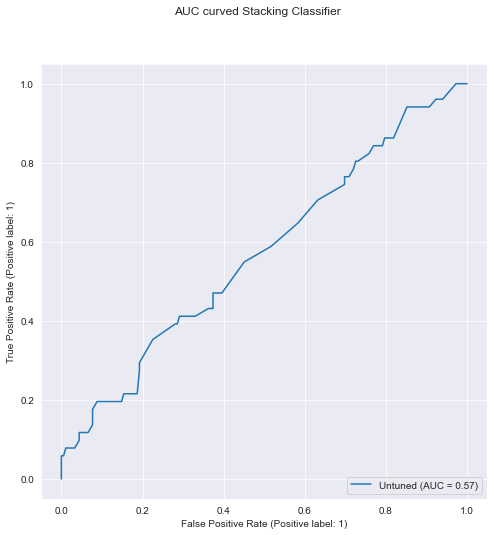

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
fig.suptitle('AUC curved Stacking Classifier')
RocCurveDisplay.from_estimator(stacking_classifiers, X_test, y_test, ax=ax, name="Untuned")
plt.show()

- Check the model with cross validate score

In [100]:
scores = pd.DataFrame(cross_validate(stacking_classifiers,X_train,y_train,cv=StratifiedKFold(n_splits=10),scoring=evaluation))

In [101]:
scores.mean()

fit_time            22.079800
score_time           0.214346
test_accuracy        0.859955
test_f1_weighted     0.832447
test_recall          0.746849
test_precision       0.951297
test_roc_auc         0.872793
dtype: float64

In [102]:
print(classification_report(y_test, stacking_classifiers.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88       182
           1       0.57      0.08      0.14        51

    accuracy                           0.79       233
   macro avg       0.68      0.53      0.51       233
weighted avg       0.74      0.79      0.72       233



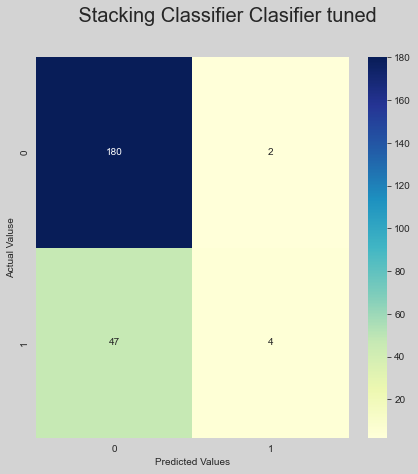

In [103]:
stacking_classifiers = rfc_tuned.predict(X_test)
confusion(stacking_classifiers,y_test,' Stacking Classifier','tuned')

<u><b> Things Observed </b></u>
- From the stacking of two different models, we do see that the f1-score are the same even when it is done run alone and that precision did boost up to `0.84`
- Precision also improved in the process
- AUC is lower than individual models

<a class="anchor" id="12"></a>
## <font color='#63B2CB'>__Final Model__</font>

- Fom the above analysis, even though stacking classifier does produced better results for some parts, it is more expensive when implementing hence  ` Random Forest Classifier is my final model`

Running the final model again

In [104]:
pipeline2_step[-1] = ("clf", rfc_tuned_result.named_steps["tuning"].best_estimator_)
rfc_tuned = Pipeline(steps=pipeline2_step)
rfc_tuned.fit(X_train, y_train)
rfc_tuned_y_pred = rfc_tuned.predict(X_test)
scores = pd.DataFrame(cross_validate(rfc_tuned,X_train,y_train,cv=StratifiedKFold(n_splits=10),scoring=evaluation))

In [105]:
scores.mean()

fit_time            3.117141
score_time          0.217635
test_accuracy       0.864326
test_f1_weighted    0.840221
test_recall         0.757567
test_precision      0.958650
test_roc_auc        0.903553
dtype: float64

Classification report

In [106]:
print(classification_report(y_test, rfc_tuned_y_pred))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88       182
           1       0.56      0.10      0.17        51

    accuracy                           0.79       233
   macro avg       0.68      0.54      0.52       233
weighted avg       0.74      0.79      0.72       233



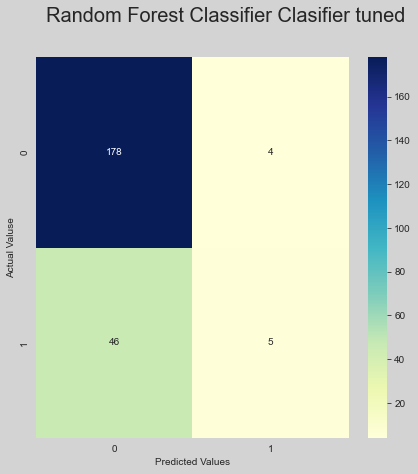

In [107]:
confusion(rfc_tuned_y_pred,y_test,'Random Forest Classifier','tuned')

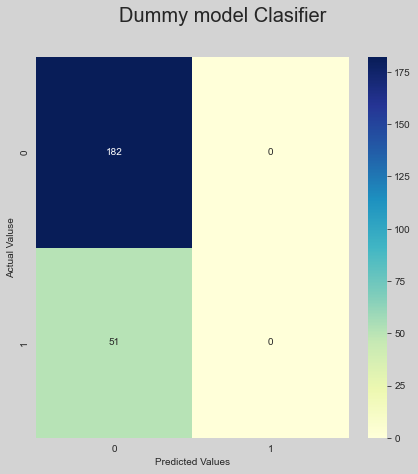

In [108]:
dummy_ypred = dummy_model.predict(X_test)
confusion(dummy_ypred,y_test,'Dummy model','')

ROC Curve comparing with base model

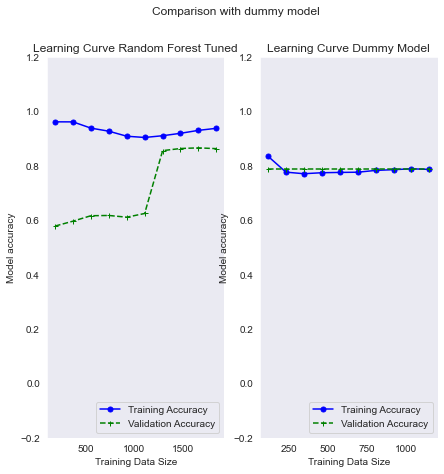

In [109]:
fig,ax = plt.subplots(1,2,figsize=(7,7))
fig.suptitle("Comparison with dummy model")
modelFunc.plot_learning_curve('Random Forest Tuned',rfc_tuned,X_train,y_train,ax[0])
modelFunc.plot_learning_curve('Dummy Model',dummy_model,X_train_original,y_train_original,ax[1])

Comparing with base model

In [110]:
difference_dummy1 = scores.mean() - dummy_scores.mean() 
difference_dummy1.dropna()

fit_time            3.069761
score_time          0.170976
test_accuracy       0.076826
test_f1_weighted    0.146336
test_precision      0.958650
test_recall         0.757567
test_roc_auc        0.403553
dtype: float64

Get the feature names for analysis

In [111]:
final_estimator = rfc_tuned.named_steps['clf']
feature_names = final_estimator.feature_importances_
feature_names

array([0.06519476, 0.04097372, 0.03323004, 0.04037375, 0.037562  ,
       0.00365159, 0.00434202, 0.00366321, 0.00235361, 0.00362614,
       0.01646572, 0.04029876, 0.02553395, 0.04385197, 0.03048909,
       0.06308923, 0.08727768, 0.0417286 , 0.07356848, 0.03836041,
       0.03780146, 0.01264831, 0.08219187, 0.08098402, 0.09073959])

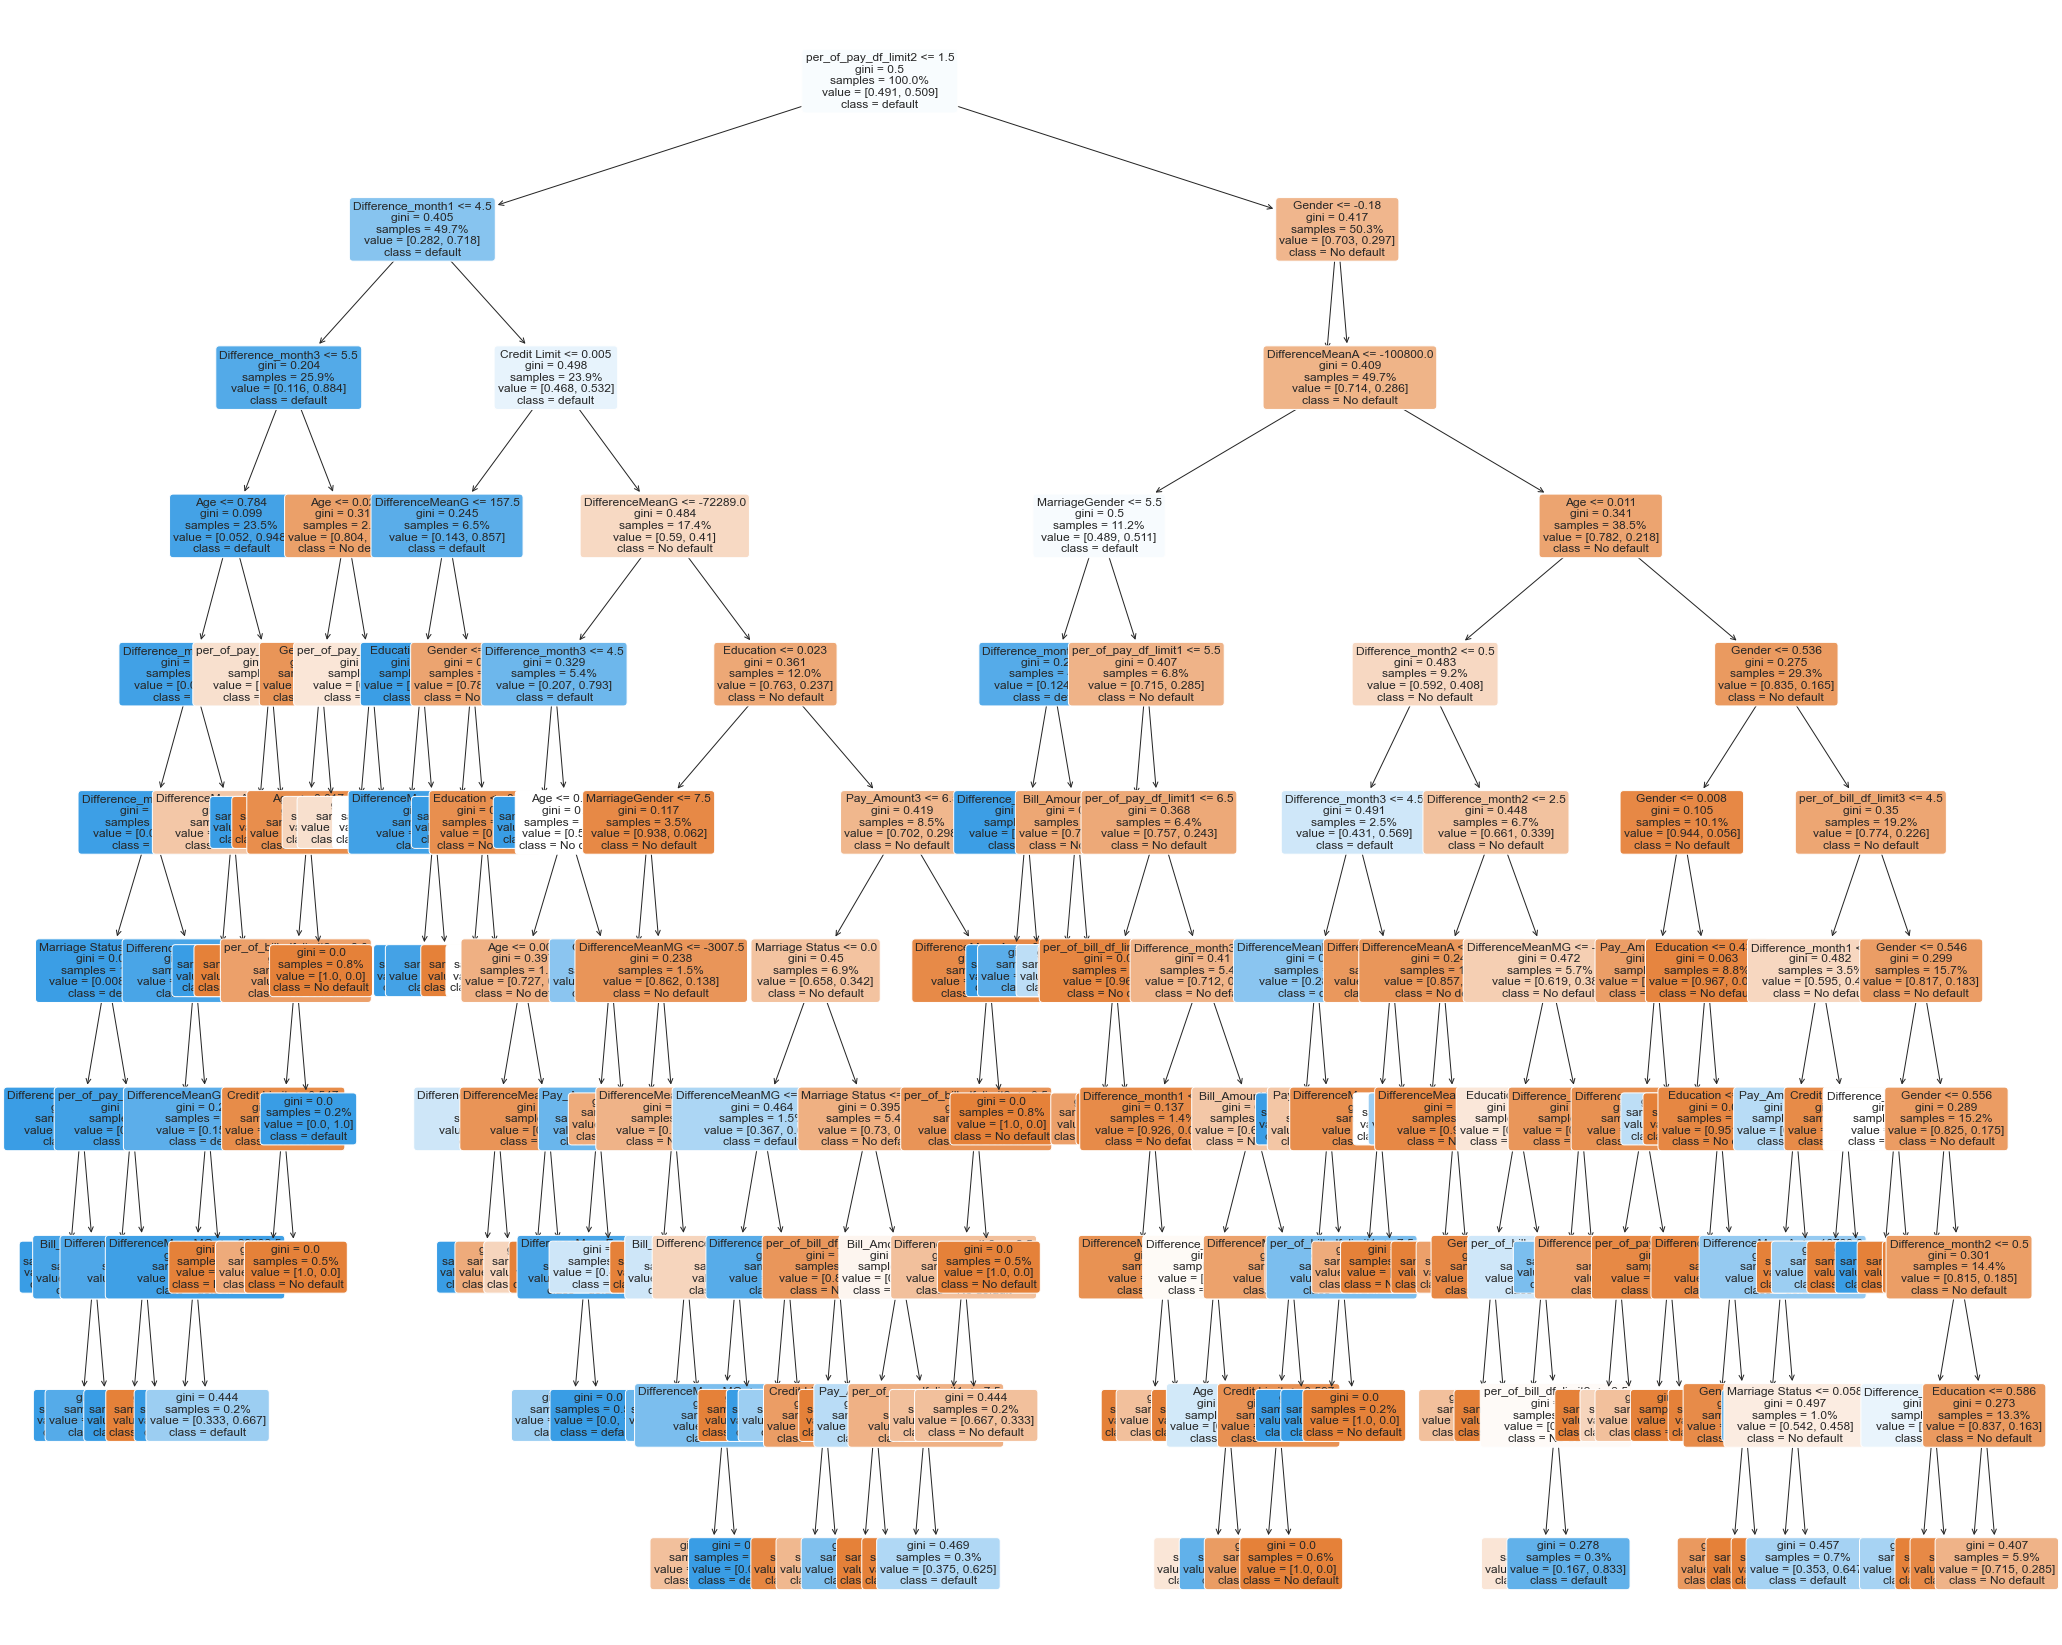

In [112]:
fig, ax = plt.subplots(figsize=(35, 30))
plot_tree(rfc_tuned[-1][42], filled=True, ax=ax, feature_names=X_train.columns, fontsize=12, class_names=['No default','default'], proportion=True, rounded=True)
plt.show()


<u><b>Things Observed</b></u>
- From the confusion matrix we can see that the model weakness is in terms of false negative where it has a high number which causes the accuracy
- From the above evaulation, it has a precision of `78`, recall score of '0.79' and an accuracy score of `0.86`, which is the best of both world, previous model has a higher accuracy score but this is due to overfitting which makes the model inaccurate
- Comparing with the base model, we can see that overall Random Forest Clasifier preformed much better than it

Answering to ` Can you say anything about the errors that the system makes?`

- This sytem tends to make mistake in predicting positive class but this could be due to the dataset being imbalanace and too small

<a class="anchor" id="13"></a>
## <font color='#63B2CB'>__Feature Importance Analysis__ </font>

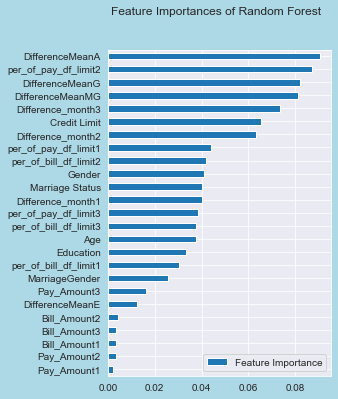

In [113]:
fig,ax = plt.subplots(figsize=(8,8))
pd.DataFrame(rfc_tuned[-1].feature_importances_, index = X_train.columns,columns=["Feature Importance"]).sort_values("Feature Importance").plot(kind="barh", figsize=(4, 6),ax=ax)
fig.suptitle("Feature Importances of Random Forest")
fig.set_facecolor('lightblue')
plt.show()

<u><b>Things Observed</b></u>
- From the above feature importance, we can see that the best feautre was actually difference between mean between gender, which could possibly means that if there is a huge difference between the average, then there could be a higher risk of defaulting

<a class="anchor" id="14"></a>
## <font color='#63B2CB'>__Summary__</font>

- Overall the model improved as compared to a baseline model, while stacking classifier was great the score produced for auc is not ideal, hence I reverted to Random Forest for a more balanced score across the board
- In addition this model has a 0.99 score of recall when predicitng class 0
